In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [24]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [25]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [26]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


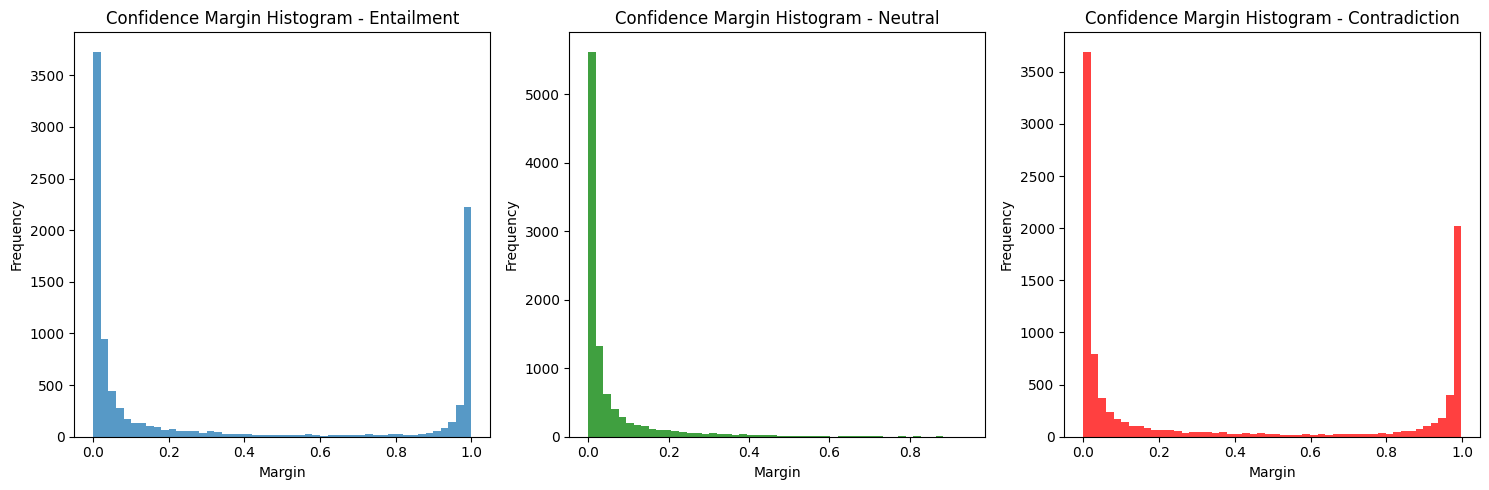

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [28]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [29]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [30]:
high_confidence_anli_r3

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515,1
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120,2
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189,0
5,0.002461,0.150678,0.846861,0.999220,0.000554,0.000227,0.985221,0.014745,0.000034,0,0.013998,0.135933,0.846635,2
8,0.131793,0.776056,0.092151,0.000384,0.002570,0.997046,0.049409,0.904356,0.046236,0,0.082384,0.128299,0.904895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.957103,0.040533,0.002363,0.000066,0.000316,0.999618,0.009265,0.016116,0.974619,2,0.947838,0.024417,0.024999,0
1194,0.945850,0.052813,0.001337,0.000607,0.000853,0.998540,0.000205,0.000291,0.999504,2,0.945243,0.051960,0.000965,0
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379,0
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452,2


In [31]:
high_confidence_mnli_mismatched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2,0.998773,0.003385,0.004211,0
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2,0.991698,0.008714,0.014951,0
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0,0.011021,0.011334,0.992721,2
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2,0.825931,0.525168,0.526413,0
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0,0.009215,0.010844,0.993904,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.000760,0.013837,0.985402,0.972984,0.025382,0.001634,0.925212,0.069991,0.004798,0,0.047772,0.044608,0.980605,2
9825,0.000145,0.003906,0.995949,0.952827,0.045891,0.001281,0.965645,0.032757,0.001598,0,0.012818,0.013134,0.994351,2
9826,0.996226,0.003656,0.000118,0.000353,0.104717,0.894930,0.004991,0.039946,0.955062,2,0.991234,0.064771,0.060132,0
9828,0.997044,0.001226,0.001730,0.000364,0.000717,0.998919,0.019078,0.039258,0.941663,2,0.977966,0.038033,0.057256,0


In [32]:
!pip install  torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:0000:01


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


2024-04-22 16:38:11.126470: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 16:38:11.126573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 16:38:11.279790: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to create graph data
def create_graph(data, labels):
    num_nodes = data.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))
    return graph_data


# Create a GAT-based model with 2 GATConv layers
class SimpleGAT(torch.nn.Module):
    def __init__(self, input_dim, heads=4):
        super(SimpleGAT, self).__init__()
        self.conv1 = GATConv(input_dim, 32, heads=heads)  # Input to hidden layer with multiple attention heads
        self.conv2 = GATConv(32 * heads, 3, heads=1)  # Output layer for classification with one head

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)  # Dropout
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create early stopping utility
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True

In [35]:
# Define a function to plot training and validation metrics
def plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    # Training and validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.legend()
    # Training and validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the train and evaluate function for GAT
def train_and_evaluate_gat(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = SimpleGAT(input_dim)  # Instantiate GAT model with the correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss

        # Calculate training accuracy
        train_pred = out.argmax(dim=1)  # Get predicted labels
        train_correct = (train_pred == train_data.y).sum().item()  # Correct predictions
        train_accuracy = train_correct / train_data.num_nodes
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())  # Store validation loss
            val_pred = val_out.argmax(dim=1)  # Get predicted labels
            val_correct = (val_pred == test_data.y).sum().item()  # Correct predictions
            val_accuracy = val_correct / test_data.num_nodes  # Validation accuracy
            val_accuracies.append(val_accuracy)

        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Final validation loss and accuracy
    final_val_loss = val_losses[-1]
    final_val_accuracy = val_accuracies[-1]

    print(f"Final Validation Loss on {name}: {final_val_loss:.4f}")
    print(f"Final Validation Accuracy on {name}: {final_val_accuracy:.4f}")

    # Plot training and validation curves
    plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, name)

    return model, final_val_loss, final_val_accuracy

Epoch 1/100, Train Loss: 1.0600, Val Loss: 0.8902, Val Accuracy: 0.9296
Epoch 2/100, Train Loss: 0.8994, Val Loss: 0.7542, Val Accuracy: 0.9403
Epoch 3/100, Train Loss: 0.7630, Val Loss: 0.6397, Val Accuracy: 0.9428
Epoch 4/100, Train Loss: 0.6433, Val Loss: 0.5437, Val Accuracy: 0.9437
Epoch 5/100, Train Loss: 0.5454, Val Loss: 0.4637, Val Accuracy: 0.9437
Epoch 6/100, Train Loss: 0.4609, Val Loss: 0.3990, Val Accuracy: 0.9437
Epoch 7/100, Train Loss: 0.3920, Val Loss: 0.3477, Val Accuracy: 0.9437
Epoch 8/100, Train Loss: 0.3349, Val Loss: 0.3076, Val Accuracy: 0.9445
Epoch 9/100, Train Loss: 0.2906, Val Loss: 0.2772, Val Accuracy: 0.9445
Epoch 10/100, Train Loss: 0.2586, Val Loss: 0.2551, Val Accuracy: 0.9445
Epoch 11/100, Train Loss: 0.2297, Val Loss: 0.2394, Val Accuracy: 0.9445
Epoch 12/100, Train Loss: 0.2125, Val Loss: 0.2285, Val Accuracy: 0.9445
Epoch 13/100, Train Loss: 0.1994, Val Loss: 0.2210, Val Accuracy: 0.9445
Epoch 14/100, Train Loss: 0.1883, Val Loss: 0.2158, Val Accu

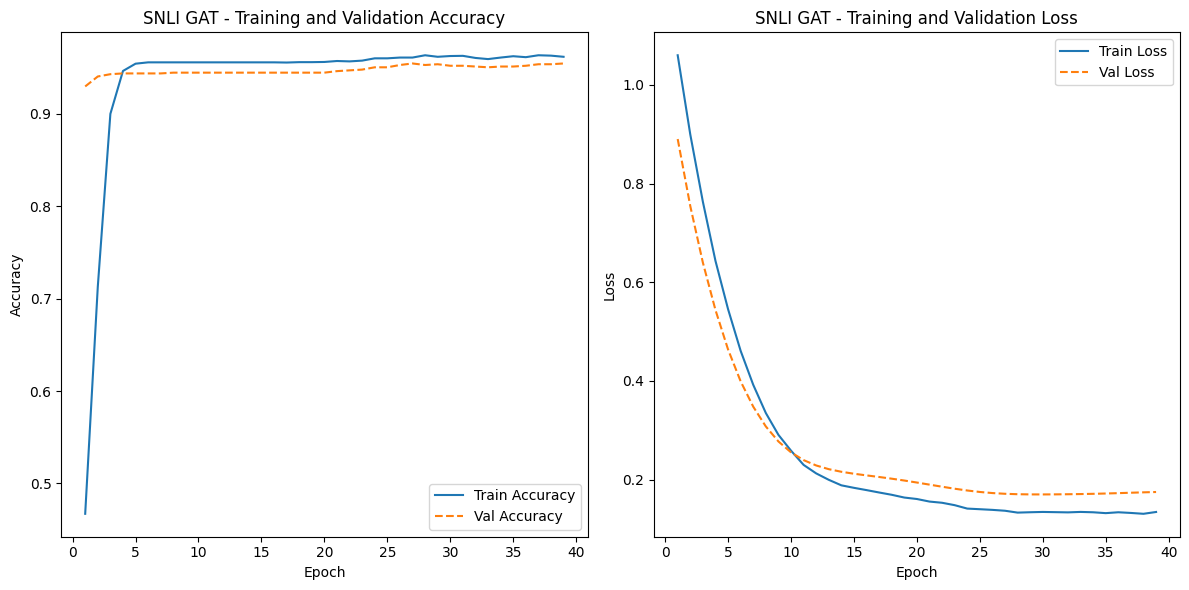

In [37]:
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Create graph data for SNLI
train_graph_snli = create_graph(X_train_snli, y_train_snli)
test_graph_snli = create_graph(X_test_snli, y_test_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate_gat(
    train_graph_snli, test_graph_snli, 'SNLI GAT'
)


Epoch 1/100, Train Loss: 1.1633, Val Loss: 0.9837, Val Accuracy: 0.9462
Epoch 2/100, Train Loss: 0.9903, Val Loss: 0.8318, Val Accuracy: 0.9599
Epoch 3/100, Train Loss: 0.8395, Val Loss: 0.7015, Val Accuracy: 0.9608
Epoch 4/100, Train Loss: 0.7083, Val Loss: 0.5916, Val Accuracy: 0.9608
Epoch 5/100, Train Loss: 0.5973, Val Loss: 0.5006, Val Accuracy: 0.9616
Epoch 6/100, Train Loss: 0.5077, Val Loss: 0.4257, Val Accuracy: 0.9616
Epoch 7/100, Train Loss: 0.4279, Val Loss: 0.3648, Val Accuracy: 0.9616
Epoch 8/100, Train Loss: 0.3692, Val Loss: 0.3159, Val Accuracy: 0.9616
Epoch 9/100, Train Loss: 0.3174, Val Loss: 0.2774, Val Accuracy: 0.9616
Epoch 10/100, Train Loss: 0.2777, Val Loss: 0.2480, Val Accuracy: 0.9616
Epoch 11/100, Train Loss: 0.2484, Val Loss: 0.2261, Val Accuracy: 0.9616
Epoch 12/100, Train Loss: 0.2225, Val Loss: 0.2100, Val Accuracy: 0.9616
Epoch 13/100, Train Loss: 0.2052, Val Loss: 0.1988, Val Accuracy: 0.9616
Epoch 14/100, Train Loss: 0.1930, Val Loss: 0.1915, Val Accu

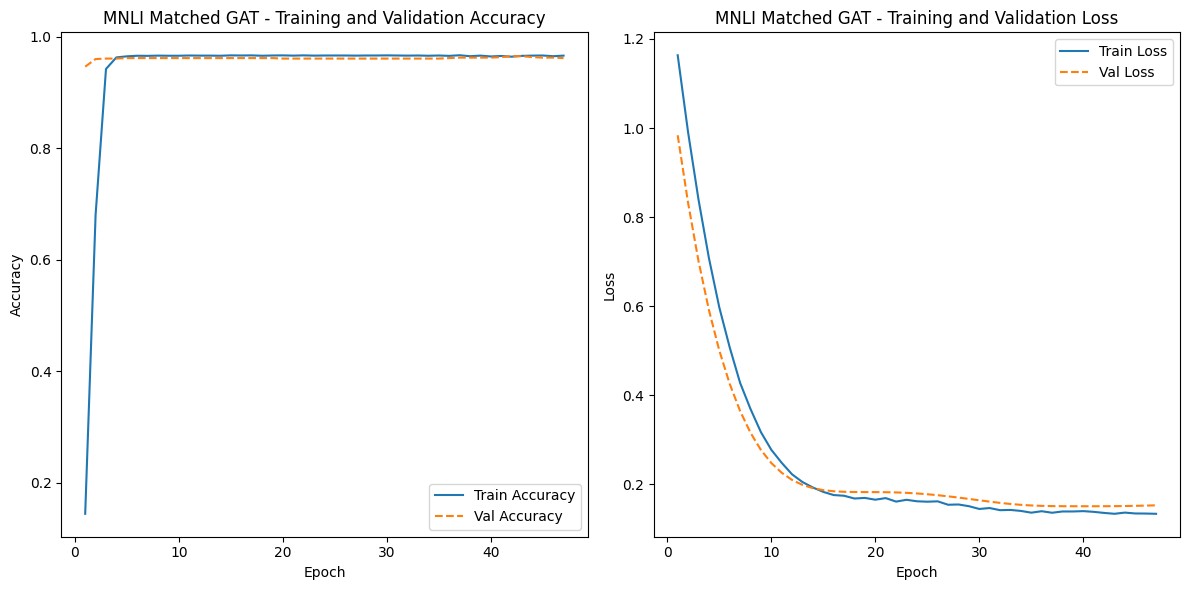

In [38]:
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Create graph data for MNLI Matched
train_graph_mnli_matched = create_graph(X_train_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_test_mnli_matched, y_test_mnli_matched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate_gat(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched GAT'
)

Epoch 1/100, Train Loss: 1.1039, Val Loss: 0.9181, Val Accuracy: 0.9653
Epoch 2/100, Train Loss: 0.9223, Val Loss: 0.7619, Val Accuracy: 0.9662
Epoch 3/100, Train Loss: 0.7673, Val Loss: 0.6288, Val Accuracy: 0.9662
Epoch 4/100, Train Loss: 0.6356, Val Loss: 0.5184, Val Accuracy: 0.9662
Epoch 5/100, Train Loss: 0.5257, Val Loss: 0.4279, Val Accuracy: 0.9662
Epoch 6/100, Train Loss: 0.4365, Val Loss: 0.3559, Val Accuracy: 0.9662
Epoch 7/100, Train Loss: 0.3641, Val Loss: 0.3005, Val Accuracy: 0.9662
Epoch 8/100, Train Loss: 0.3110, Val Loss: 0.2594, Val Accuracy: 0.9662
Epoch 9/100, Train Loss: 0.2689, Val Loss: 0.2291, Val Accuracy: 0.9662
Epoch 10/100, Train Loss: 0.2374, Val Loss: 0.2074, Val Accuracy: 0.9662
Epoch 11/100, Train Loss: 0.2145, Val Loss: 0.1920, Val Accuracy: 0.9662
Epoch 12/100, Train Loss: 0.1993, Val Loss: 0.1813, Val Accuracy: 0.9662
Epoch 13/100, Train Loss: 0.1877, Val Loss: 0.1741, Val Accuracy: 0.9662
Epoch 14/100, Train Loss: 0.1806, Val Loss: 0.1694, Val Accu

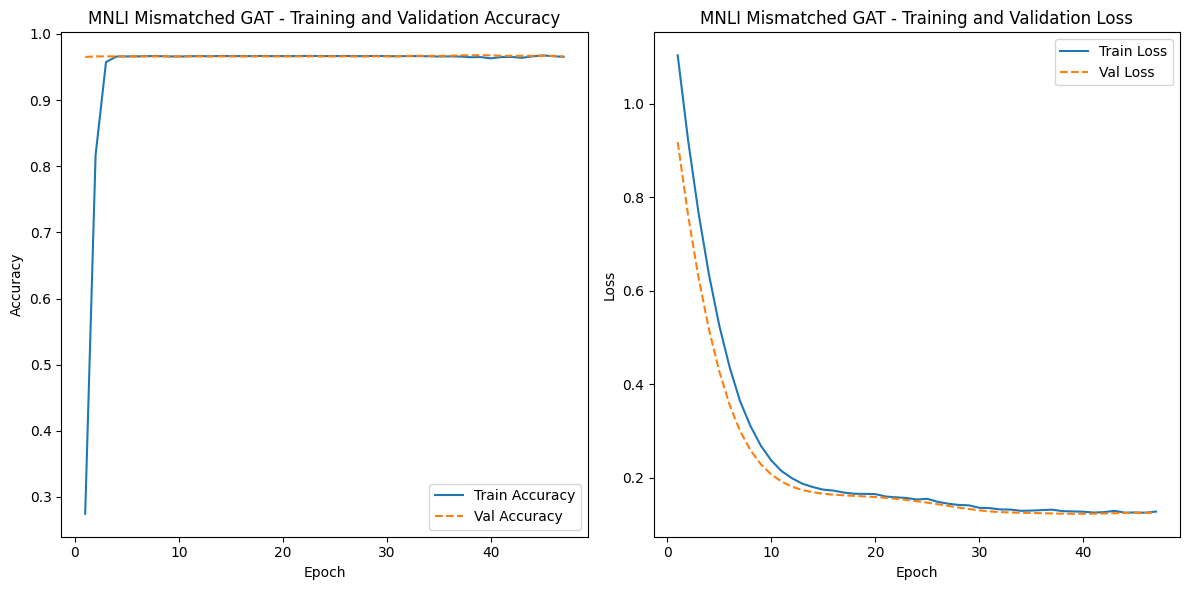

In [39]:
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Create graph data for MNLI mismatched
train_graph_mnli_mismatched = create_graph(X_train_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_test_mnli_mismatched, y_test_mnli_mismatched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate_gat(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched GAT'
)

Epoch 1/100, Train Loss: 1.2841, Val Loss: 1.2009, Val Accuracy: 0.3372
Epoch 2/100, Train Loss: 1.1556, Val Loss: 1.0823, Val Accuracy: 0.4186
Epoch 3/100, Train Loss: 1.0651, Val Loss: 0.9787, Val Accuracy: 0.7442
Epoch 4/100, Train Loss: 0.9813, Val Loss: 0.8880, Val Accuracy: 0.7674
Epoch 5/100, Train Loss: 0.9096, Val Loss: 0.8091, Val Accuracy: 0.7674
Epoch 6/100, Train Loss: 0.8302, Val Loss: 0.7404, Val Accuracy: 0.8140
Epoch 7/100, Train Loss: 0.7843, Val Loss: 0.6805, Val Accuracy: 0.8140
Epoch 8/100, Train Loss: 0.7342, Val Loss: 0.6289, Val Accuracy: 0.8372
Epoch 9/100, Train Loss: 0.7034, Val Loss: 0.5855, Val Accuracy: 0.8488
Epoch 10/100, Train Loss: 0.6727, Val Loss: 0.5488, Val Accuracy: 0.8488
Epoch 11/100, Train Loss: 0.6368, Val Loss: 0.5177, Val Accuracy: 0.8372
Epoch 12/100, Train Loss: 0.6168, Val Loss: 0.4915, Val Accuracy: 0.8256
Epoch 13/100, Train Loss: 0.6127, Val Loss: 0.4695, Val Accuracy: 0.8372
Epoch 14/100, Train Loss: 0.5896, Val Loss: 0.4513, Val Accu

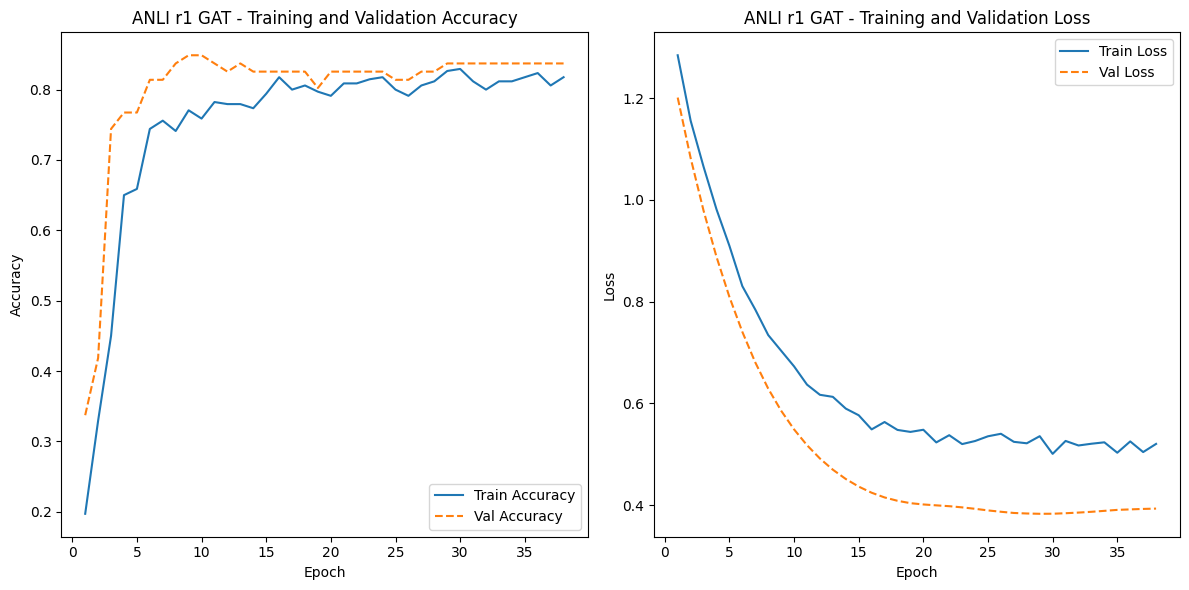

In [40]:
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Create graph data for ANLI r1
train_graph_anli_r1 = create_graph(X_train_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_test_anli_r1, y_test_anli_r1)

# Call the function to train and evaluate for ANLI r1
model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate_gat(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI r1 GAT'
)

Epoch 1/100, Train Loss: 1.1155, Val Loss: 1.0364, Val Accuracy: 0.5281
Epoch 2/100, Train Loss: 1.0444, Val Loss: 0.9701, Val Accuracy: 0.6854
Epoch 3/100, Train Loss: 0.9781, Val Loss: 0.9129, Val Accuracy: 0.6966
Epoch 4/100, Train Loss: 0.9230, Val Loss: 0.8634, Val Accuracy: 0.6966
Epoch 5/100, Train Loss: 0.8727, Val Loss: 0.8208, Val Accuracy: 0.6966
Epoch 6/100, Train Loss: 0.8390, Val Loss: 0.7841, Val Accuracy: 0.6966
Epoch 7/100, Train Loss: 0.7882, Val Loss: 0.7532, Val Accuracy: 0.6966
Epoch 8/100, Train Loss: 0.7767, Val Loss: 0.7273, Val Accuracy: 0.7191
Epoch 9/100, Train Loss: 0.7577, Val Loss: 0.7059, Val Accuracy: 0.7079
Epoch 10/100, Train Loss: 0.7368, Val Loss: 0.6881, Val Accuracy: 0.7191
Epoch 11/100, Train Loss: 0.7029, Val Loss: 0.6735, Val Accuracy: 0.7303
Epoch 12/100, Train Loss: 0.7081, Val Loss: 0.6619, Val Accuracy: 0.7416
Epoch 13/100, Train Loss: 0.6995, Val Loss: 0.6533, Val Accuracy: 0.7416
Epoch 14/100, Train Loss: 0.6998, Val Loss: 0.6473, Val Accu

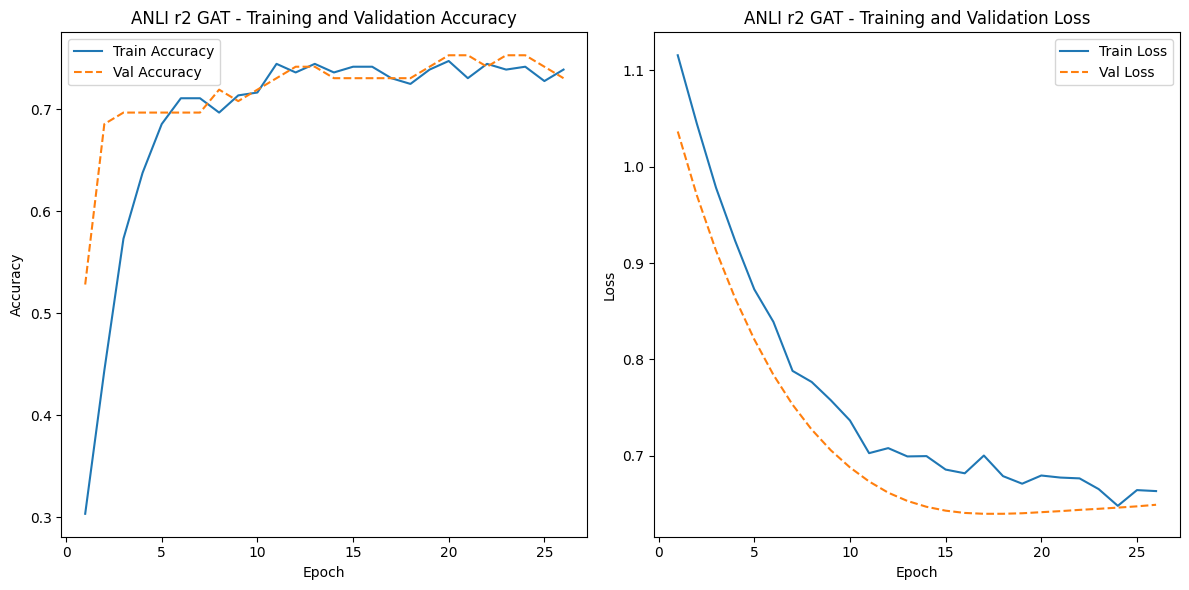

In [41]:
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Create graph data for ANLI r2
train_graph_anli_r2 = create_graph(X_train_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_test_anli_r2, y_test_anli_r2)

# Call the function to train and evaluate for ANLI r2
model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate_gat(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI r2 GAT'
)

Epoch 1/100, Train Loss: 1.0890, Val Loss: 1.0270, Val Accuracy: 0.4811
Epoch 2/100, Train Loss: 1.0212, Val Loss: 0.9705, Val Accuracy: 0.5000
Epoch 3/100, Train Loss: 0.9686, Val Loss: 0.9211, Val Accuracy: 0.5660
Epoch 4/100, Train Loss: 0.9159, Val Loss: 0.8775, Val Accuracy: 0.6415
Epoch 5/100, Train Loss: 0.8746, Val Loss: 0.8386, Val Accuracy: 0.6509
Epoch 6/100, Train Loss: 0.8312, Val Loss: 0.8034, Val Accuracy: 0.6509
Epoch 7/100, Train Loss: 0.8009, Val Loss: 0.7719, Val Accuracy: 0.6604
Epoch 8/100, Train Loss: 0.7804, Val Loss: 0.7432, Val Accuracy: 0.6698
Epoch 9/100, Train Loss: 0.7461, Val Loss: 0.7183, Val Accuracy: 0.6981
Epoch 10/100, Train Loss: 0.7356, Val Loss: 0.6970, Val Accuracy: 0.6981
Epoch 11/100, Train Loss: 0.7128, Val Loss: 0.6797, Val Accuracy: 0.6981
Epoch 12/100, Train Loss: 0.6960, Val Loss: 0.6660, Val Accuracy: 0.7170
Epoch 13/100, Train Loss: 0.6969, Val Loss: 0.6555, Val Accuracy: 0.7170
Epoch 14/100, Train Loss: 0.6923, Val Loss: 0.6476, Val Accu

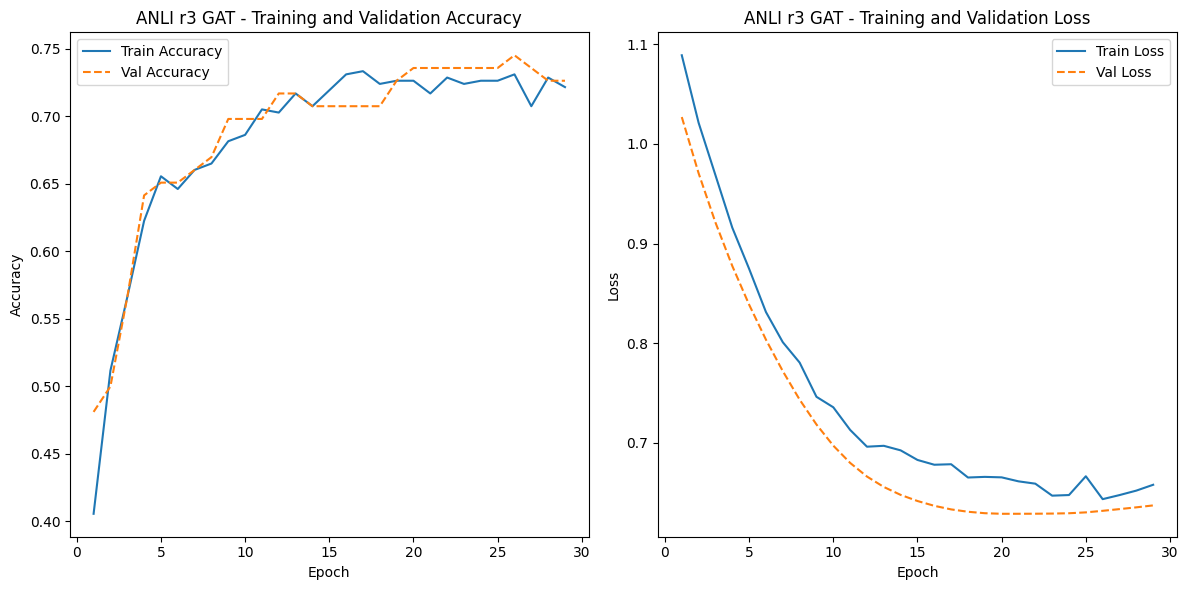

In [42]:
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Create graph data for ANLI r3
train_graph_anli_r3 = create_graph(X_train_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_test_anli_r3, y_test_anli_r3)

# Call the function to train and evaluate for ANLI r3
model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate_gat(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI r3 GAT'
)

/tmp/ipykernel_34/3761694434.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 1/100, Train Loss: 1.1897, Val Loss: 1.0155, Val Accuracy: 0.4992
Epoch 2/100, Train Loss: 1.0197, Val Loss: 0.8703, Val Accuracy: 0.9368
Epoch 3/100, Train Loss: 0.8752, Val Loss: 0.7467, Val Accuracy: 0.9373
Epoch 4/100, Train Loss: 0.7514, Val Loss: 0.6406, Val Accuracy: 0.9378
Epoch 5/100, Train Loss: 0.6433, Val Loss: 0.5506, Val Accuracy: 0.9373
Epoch 6/100, Train Loss: 0.5534, Val Loss: 0.4754, Val Accuracy: 0.9370
Epoch 7/100, Train Loss: 0.4784, Val Loss: 0.4139, Val Accuracy: 0.9365
Epoch 8/100, Train Loss: 0.4171, Val Loss: 0.3649, Val Accuracy: 0.9368
Epoch 9/100, Train Loss: 0.3677, Val Loss: 0.3260, Val Accuracy: 0.9370
Epoch 10/100, Train Loss: 0.3293, Val Loss: 0.2958, Val Accuracy: 0.9370
Epoch 11/100, Train Loss: 0.2978, Val Loss: 0.2731, Val Accuracy: 0.9370
Epoch 12/100, Train Loss: 0.2748, Val Loss: 0.2561, Val Accuracy: 0.9370
Epoch 13/100, Train Loss: 0.2557, Val Loss: 0.2435, Val Accuracy: 0.9370
Epoch 14/100, Train Loss: 0.2411, Val Loss: 0.2341, Val Accu

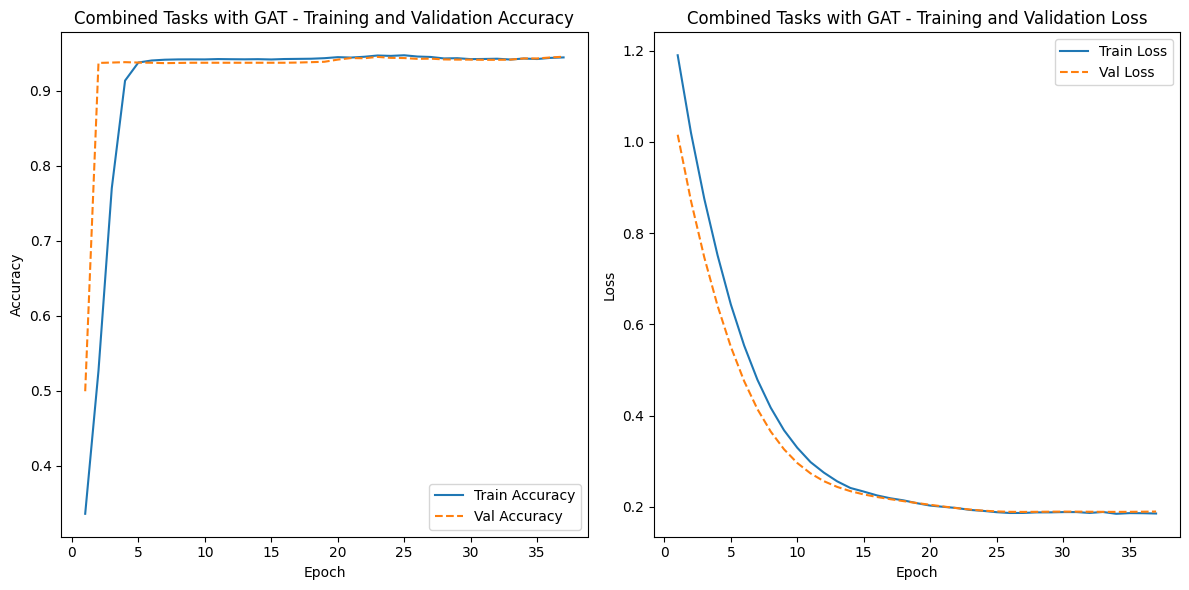

In [43]:
import torch

# Convert NumPy arrays to PyTorch tensors
X_train_snli_tensor = torch.tensor(X_train_snli)
X_train_mnli_matched_tensor = torch.tensor(X_train_mnli_matched)
X_train_mnli_mismatched_tensor = torch.tensor(X_train_mnli_mismatched)
X_train_anli_r1_tensor = torch.tensor(X_train_anli_r1)
X_train_anli_r2_tensor = torch.tensor(X_train_anli_r2)
X_train_anli_r3_tensor = torch.tensor(X_train_anli_r3)

y_train_snli_tensor = torch.tensor(y_train_snli)
y_train_mnli_matched_tensor = torch.tensor(y_train_mnli_matched)
y_train_mnli_mismatched_tensor = torch.tensor(y_train_mnli_mismatched)
y_train_anli_r1_tensor = torch.tensor(y_train_anli_r1)
y_train_anli_r2_tensor = torch.tensor(y_train_anli_r2)
y_train_anli_r3_tensor = torch.tensor(y_train_anli_r3)

# Concatenate X_train and y_train for all tasks
X_train_all = torch.cat([X_train_snli_tensor, X_train_mnli_matched_tensor, X_train_mnli_mismatched_tensor, X_train_anli_r1_tensor, X_train_anli_r2_tensor, X_train_anli_r3_tensor], dim=0)
y_train_all = torch.cat([y_train_snli_tensor, y_train_mnli_matched_tensor, y_train_mnli_mismatched_tensor, y_train_anli_r1_tensor, y_train_anli_r2_tensor, y_train_anli_r3_tensor], dim=0)

# Convert NumPy arrays to PyTorch tensors for test data
X_test_snli_tensor = torch.tensor(X_test_snli)
X_test_mnli_matched_tensor = torch.tensor(X_test_mnli_matched)
X_test_mnli_mismatched_tensor = torch.tensor(X_test_mnli_mismatched)
X_test_anli_r1_tensor = torch.tensor(X_test_anli_r1)
X_test_anli_r2_tensor = torch.tensor(X_test_anli_r2)
X_test_anli_r3_tensor = torch.tensor(X_test_anli_r3)

y_test_snli_tensor = torch.tensor(y_test_snli)
y_test_mnli_matched_tensor = torch.tensor(y_test_mnli_matched)
y_test_mnli_mismatched_tensor = torch.tensor(y_test_mnli_mismatched)
y_test_anli_r1_tensor = torch.tensor(y_test_anli_r1)
y_test_anli_r2_tensor = torch.tensor(y_test_anli_r2)
y_test_anli_r3_tensor = torch.tensor(y_test_anli_r3)

# Concatenate X_test and y_test for all tasks
X_test_all = torch.cat([X_test_snli_tensor, X_test_mnli_matched_tensor, X_test_mnli_mismatched_tensor, X_test_anli_r1_tensor, X_test_anli_r2_tensor, X_test_anli_r3_tensor], dim=0)
y_test_all = torch.cat([y_test_snli_tensor, y_test_mnli_matched_tensor, y_test_mnli_mismatched_tensor, y_test_anli_r1_tensor, y_test_anli_r2_tensor, y_test_anli_r3_tensor], dim=0)

# Create graph data for ALL combined data
train_graph_all = create_graph(X_train_all, y_train_all)
test_graph_all = create_graph(X_test_all, y_test_all)

# Train and evaluate the model on the combined dataset
model_all, final_val_loss_all, final_val_accuracy_all = train_and_evaluate_gat(
    train_graph_all, test_graph_all, 'Combined Tasks with GAT'
)


In [44]:
# Specify the file path where you want to save the model
model_save_path = "/kaggle/working/GAT_feature_ensemble.h5"

# Save the model
torch.save(model_all.state_dict(), model_save_path)

print(f"Model saved successfully at: {model_save_path}")


Model saved successfully at: /kaggle/working/GAT_feature_ensemble.h5


In [51]:
from sklearn.model_selection import KFold
import numpy as np

from sklearn.model_selection import KFold
import numpy as np

# Define K-Fold cross-validation for GAT
def cross_validate(task_name, X_train, y_train, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True)  # Initialize K-Fold
    val_losses, val_accuracies = [], []

    # Iterate through each fold
    for fold_idx, (train_indices, val_indices) in enumerate(kf.split(X_train)):
        # Split data into training and validation sets for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]

        # Create graph data for this fold
        train_graph_fold = create_graph(X_train_fold, y_train_fold)
        val_graph_fold = create_graph(X_val_fold, y_val_fold)

        # Train and evaluate the GAT on this fold
        _, val_loss_fold, val_accuracy_fold = train_and_evaluate_gat(
            train_graph_fold, val_graph_fold, f'{task_name} Fold {fold_idx + 1}', 
            num_epochs=num_epochs, patience=patience, learning_rate=learning_rate, weight_decay=weight_decay
        )

        # Record metrics
        val_losses.append(val_loss_fold)
        val_accuracies.append(val_accuracy_fold)

    # Calculate average results over all folds
    avg_val_loss = np.mean(val_losses)
    avg_val_accuracy = np.mean(val_accuracies)

    print(f"Average Validation Loss for {task_name} across {k} folds: {avg_val_loss:.4f}")
    print(f"Average Validation Accuracy for {task_name} across {k} folds: {avg_val_accuracy:.4f}")

    return avg_val_loss, avg_val_accuracy


Epoch 1/100, Train Loss: 0.9746, Val Loss: 0.7952, Val Accuracy: 0.9606
Epoch 2/100, Train Loss: 0.8077, Val Loss: 0.6542, Val Accuracy: 0.9606
Epoch 3/100, Train Loss: 0.6664, Val Loss: 0.5362, Val Accuracy: 0.9606
Epoch 4/100, Train Loss: 0.5512, Val Loss: 0.4400, Val Accuracy: 0.9606
Epoch 5/100, Train Loss: 0.4601, Val Loss: 0.3633, Val Accuracy: 0.9606
Epoch 6/100, Train Loss: 0.3836, Val Loss: 0.3036, Val Accuracy: 0.9606
Epoch 7/100, Train Loss: 0.3249, Val Loss: 0.2584, Val Accuracy: 0.9606
Epoch 8/100, Train Loss: 0.2803, Val Loss: 0.2249, Val Accuracy: 0.9606
Epoch 9/100, Train Loss: 0.2476, Val Loss: 0.2010, Val Accuracy: 0.9606
Epoch 10/100, Train Loss: 0.2215, Val Loss: 0.1843, Val Accuracy: 0.9606
Epoch 11/100, Train Loss: 0.2074, Val Loss: 0.1729, Val Accuracy: 0.9606
Epoch 12/100, Train Loss: 0.1952, Val Loss: 0.1653, Val Accuracy: 0.9606
Epoch 13/100, Train Loss: 0.1848, Val Loss: 0.1602, Val Accuracy: 0.9606
Epoch 14/100, Train Loss: 0.1825, Val Loss: 0.1565, Val Accu

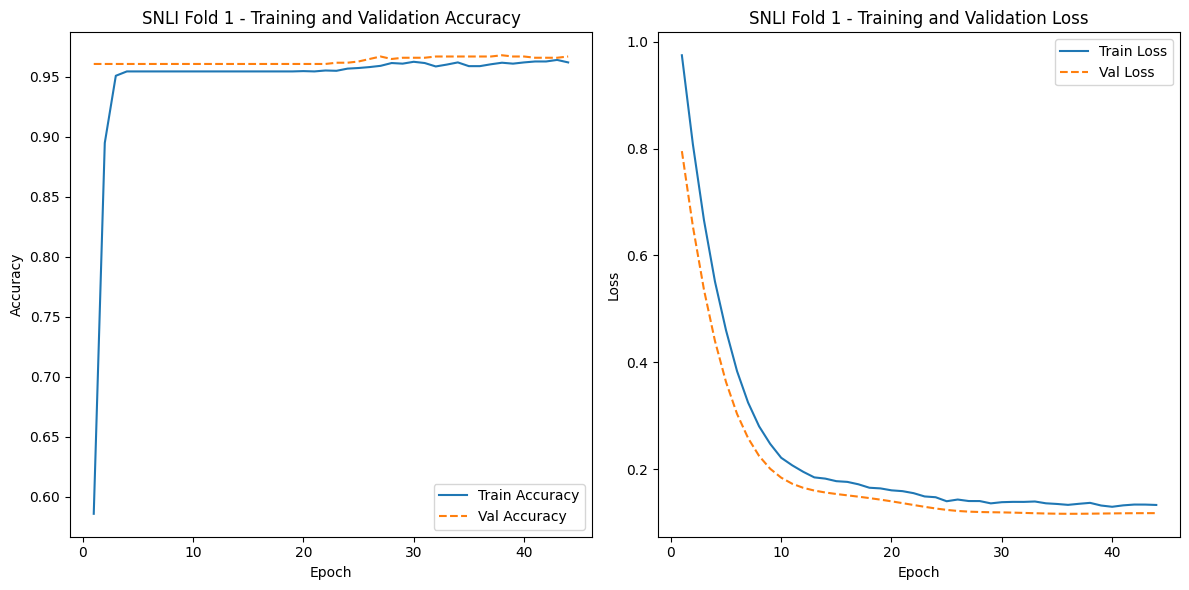

Epoch 1/100, Train Loss: 1.2645, Val Loss: 1.0778, Val Accuracy: 0.5098
Epoch 2/100, Train Loss: 1.0925, Val Loss: 0.9296, Val Accuracy: 0.9358
Epoch 3/100, Train Loss: 0.9373, Val Loss: 0.7974, Val Accuracy: 0.9389
Epoch 4/100, Train Loss: 0.7954, Val Loss: 0.6821, Val Accuracy: 0.9399
Epoch 5/100, Train Loss: 0.6771, Val Loss: 0.5833, Val Accuracy: 0.9399
Epoch 6/100, Train Loss: 0.5756, Val Loss: 0.5000, Val Accuracy: 0.9409
Epoch 7/100, Train Loss: 0.4860, Val Loss: 0.4316, Val Accuracy: 0.9420
Epoch 8/100, Train Loss: 0.4103, Val Loss: 0.3765, Val Accuracy: 0.9420
Epoch 9/100, Train Loss: 0.3485, Val Loss: 0.3336, Val Accuracy: 0.9420
Epoch 10/100, Train Loss: 0.3026, Val Loss: 0.3011, Val Accuracy: 0.9420
Epoch 11/100, Train Loss: 0.2662, Val Loss: 0.2773, Val Accuracy: 0.9420
Epoch 12/100, Train Loss: 0.2373, Val Loss: 0.2601, Val Accuracy: 0.9420
Epoch 13/100, Train Loss: 0.2176, Val Loss: 0.2481, Val Accuracy: 0.9420
Epoch 14/100, Train Loss: 0.2011, Val Loss: 0.2398, Val Accu

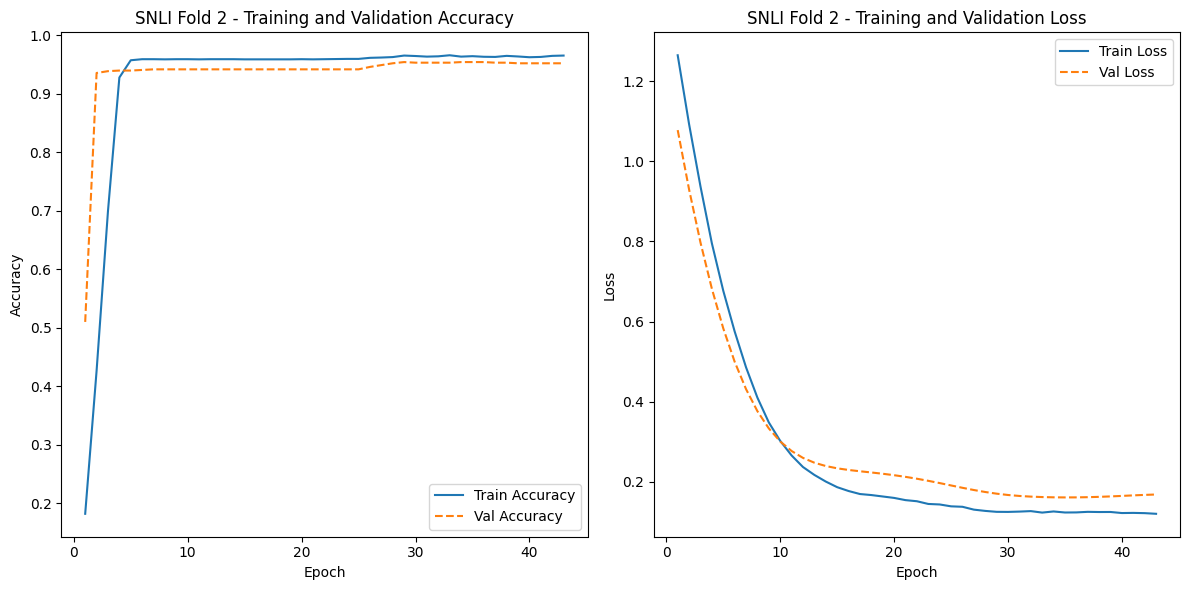

Epoch 1/100, Train Loss: 1.2423, Val Loss: 1.0649, Val Accuracy: 0.4663
Epoch 2/100, Train Loss: 1.0721, Val Loss: 0.9184, Val Accuracy: 0.9575
Epoch 3/100, Train Loss: 0.9234, Val Loss: 0.7904, Val Accuracy: 0.9575
Epoch 4/100, Train Loss: 0.7964, Val Loss: 0.6809, Val Accuracy: 0.9575
Epoch 5/100, Train Loss: 0.6901, Val Loss: 0.5860, Val Accuracy: 0.9575
Epoch 6/100, Train Loss: 0.5934, Val Loss: 0.5043, Val Accuracy: 0.9575
Epoch 7/100, Train Loss: 0.5102, Val Loss: 0.4334, Val Accuracy: 0.9575
Epoch 8/100, Train Loss: 0.4411, Val Loss: 0.3741, Val Accuracy: 0.9575
Epoch 9/100, Train Loss: 0.3832, Val Loss: 0.3251, Val Accuracy: 0.9575
Epoch 10/100, Train Loss: 0.3364, Val Loss: 0.2858, Val Accuracy: 0.9575
Epoch 11/100, Train Loss: 0.2953, Val Loss: 0.2550, Val Accuracy: 0.9575
Epoch 12/100, Train Loss: 0.2652, Val Loss: 0.2313, Val Accuracy: 0.9575
Epoch 13/100, Train Loss: 0.2389, Val Loss: 0.2134, Val Accuracy: 0.9575
Epoch 14/100, Train Loss: 0.2183, Val Loss: 0.2002, Val Accu

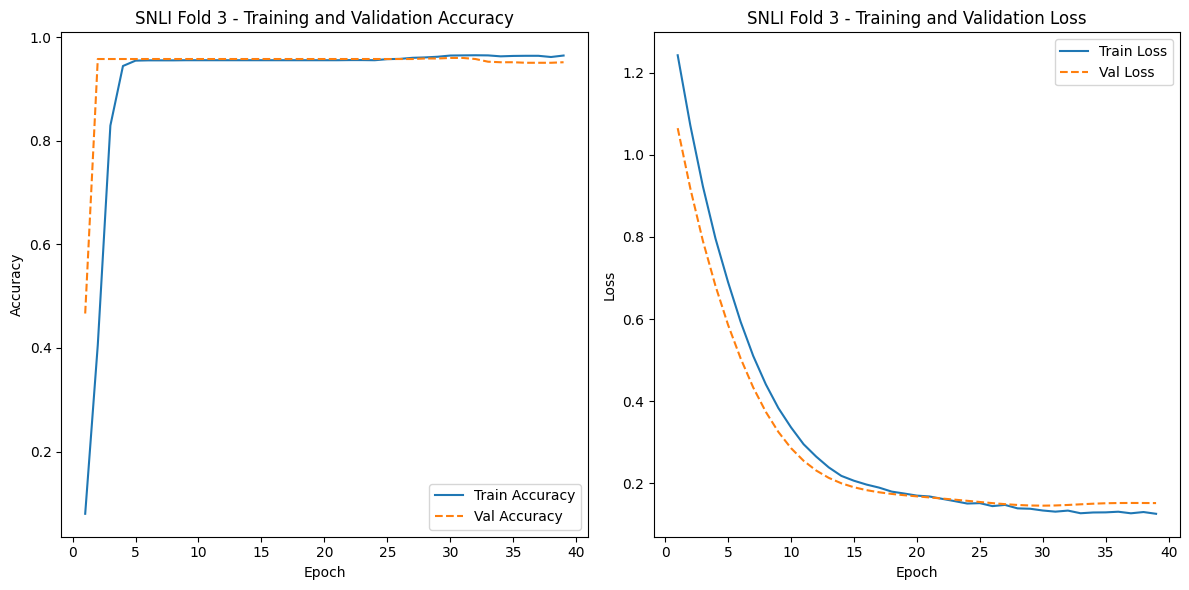

Epoch 1/100, Train Loss: 0.9941, Val Loss: 0.8439, Val Accuracy: 0.9503
Epoch 2/100, Train Loss: 0.8483, Val Loss: 0.7203, Val Accuracy: 0.9575
Epoch 3/100, Train Loss: 0.7274, Val Loss: 0.6137, Val Accuracy: 0.9585
Epoch 4/100, Train Loss: 0.6202, Val Loss: 0.5230, Val Accuracy: 0.9585
Epoch 5/100, Train Loss: 0.5327, Val Loss: 0.4480, Val Accuracy: 0.9585
Epoch 6/100, Train Loss: 0.4588, Val Loss: 0.3854, Val Accuracy: 0.9585
Epoch 7/100, Train Loss: 0.3967, Val Loss: 0.3329, Val Accuracy: 0.9585
Epoch 8/100, Train Loss: 0.3439, Val Loss: 0.2896, Val Accuracy: 0.9585
Epoch 9/100, Train Loss: 0.3062, Val Loss: 0.2545, Val Accuracy: 0.9585
Epoch 10/100, Train Loss: 0.2734, Val Loss: 0.2267, Val Accuracy: 0.9585
Epoch 11/100, Train Loss: 0.2432, Val Loss: 0.2052, Val Accuracy: 0.9585
Epoch 12/100, Train Loss: 0.2233, Val Loss: 0.1885, Val Accuracy: 0.9585
Epoch 13/100, Train Loss: 0.2093, Val Loss: 0.1757, Val Accuracy: 0.9585
Epoch 14/100, Train Loss: 0.1983, Val Loss: 0.1660, Val Accu

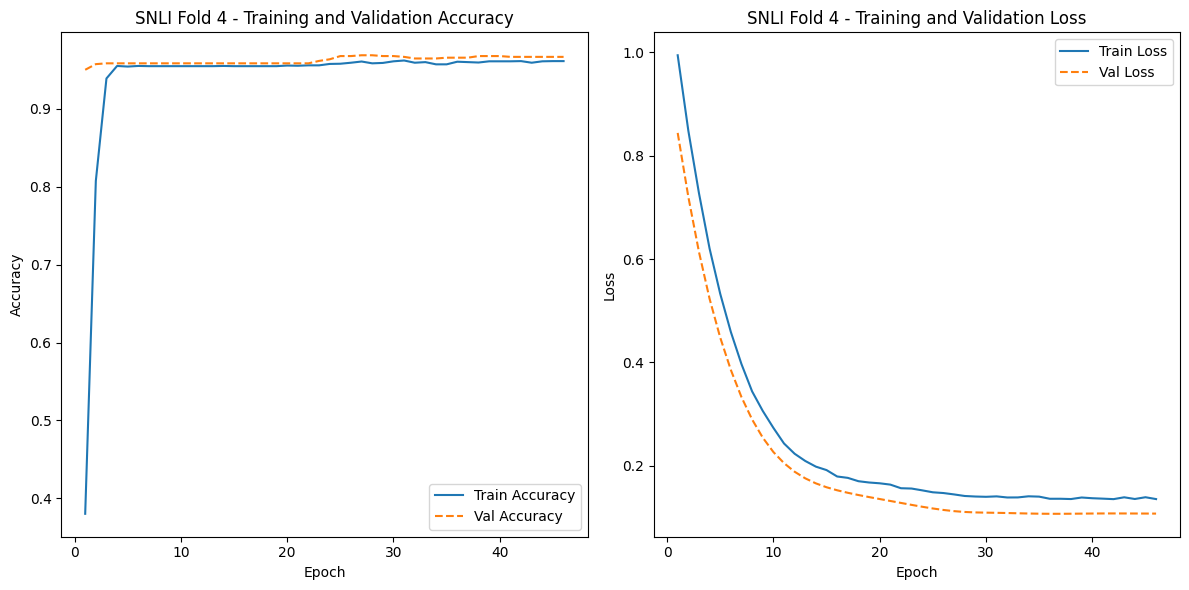

Epoch 1/100, Train Loss: 1.3094, Val Loss: 1.1227, Val Accuracy: 0.2321
Epoch 2/100, Train Loss: 1.1299, Val Loss: 0.9589, Val Accuracy: 0.9596
Epoch 3/100, Train Loss: 0.9651, Val Loss: 0.8133, Val Accuracy: 0.9596
Epoch 4/100, Train Loss: 0.8226, Val Loss: 0.6850, Val Accuracy: 0.9596
Epoch 5/100, Train Loss: 0.6940, Val Loss: 0.5729, Val Accuracy: 0.9596
Epoch 6/100, Train Loss: 0.5849, Val Loss: 0.4785, Val Accuracy: 0.9596
Epoch 7/100, Train Loss: 0.4930, Val Loss: 0.4006, Val Accuracy: 0.9596
Epoch 8/100, Train Loss: 0.4186, Val Loss: 0.3375, Val Accuracy: 0.9596
Epoch 9/100, Train Loss: 0.3563, Val Loss: 0.2876, Val Accuracy: 0.9596
Epoch 10/100, Train Loss: 0.3093, Val Loss: 0.2489, Val Accuracy: 0.9596
Epoch 11/100, Train Loss: 0.2703, Val Loss: 0.2194, Val Accuracy: 0.9596
Epoch 12/100, Train Loss: 0.2435, Val Loss: 0.1974, Val Accuracy: 0.9596
Epoch 13/100, Train Loss: 0.2232, Val Loss: 0.1813, Val Accuracy: 0.9596
Epoch 14/100, Train Loss: 0.2089, Val Loss: 0.1695, Val Accu

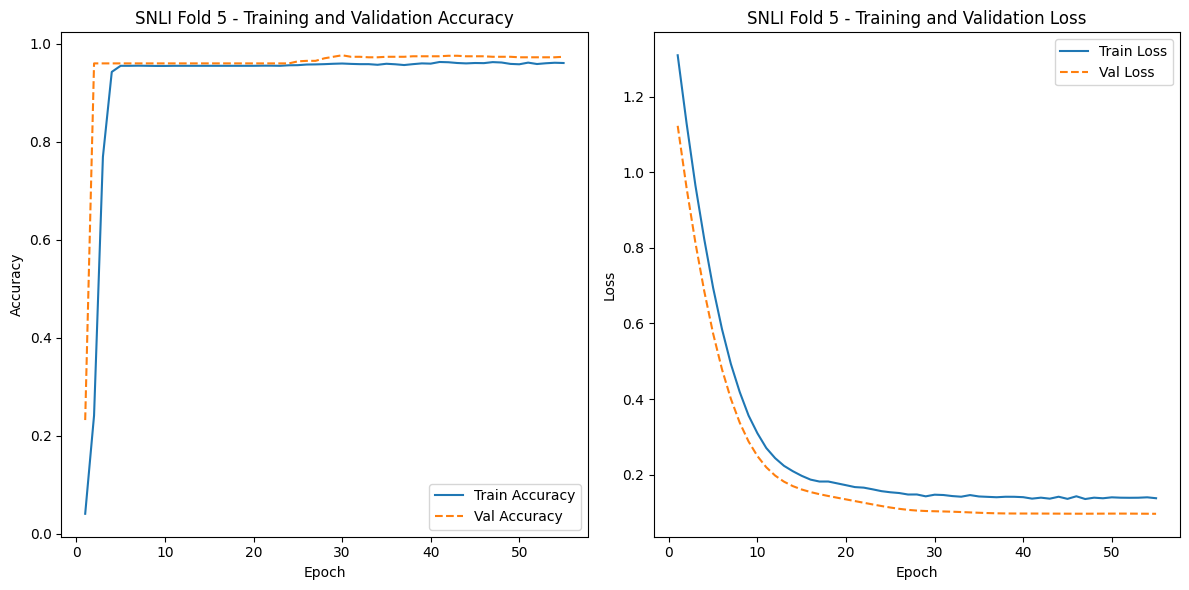

Average Validation Loss for SNLI across 5 folds: 0.1285
Average Validation Accuracy for SNLI across 5 folds: 0.9621


In [52]:
task_name = 'SNLI'
X_train = X_train_snli
y_train = y_train_snli
avg_val_loss_snli, avg_val_accuracy_snli = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 0.9354, Val Loss: 0.7859, Val Accuracy: 0.9755
Epoch 2/100, Train Loss: 0.8017, Val Loss: 0.6629, Val Accuracy: 0.9755
Epoch 3/100, Train Loss: 0.6835, Val Loss: 0.5572, Val Accuracy: 0.9755
Epoch 4/100, Train Loss: 0.5830, Val Loss: 0.4680, Val Accuracy: 0.9755
Epoch 5/100, Train Loss: 0.4968, Val Loss: 0.3925, Val Accuracy: 0.9755
Epoch 6/100, Train Loss: 0.4259, Val Loss: 0.3290, Val Accuracy: 0.9755
Epoch 7/100, Train Loss: 0.3624, Val Loss: 0.2772, Val Accuracy: 0.9755
Epoch 8/100, Train Loss: 0.3150, Val Loss: 0.2356, Val Accuracy: 0.9755
Epoch 9/100, Train Loss: 0.2748, Val Loss: 0.2034, Val Accuracy: 0.9765
Epoch 10/100, Train Loss: 0.2446, Val Loss: 0.1790, Val Accuracy: 0.9765
Epoch 11/100, Train Loss: 0.2208, Val Loss: 0.1611, Val Accuracy: 0.9765
Epoch 12/100, Train Loss: 0.2026, Val Loss: 0.1482, Val Accuracy: 0.9765
Epoch 13/100, Train Loss: 0.1914, Val Loss: 0.1392, Val Accuracy: 0.9765
Epoch 14/100, Train Loss: 0.1840, Val Loss: 0.1328, Val Accu

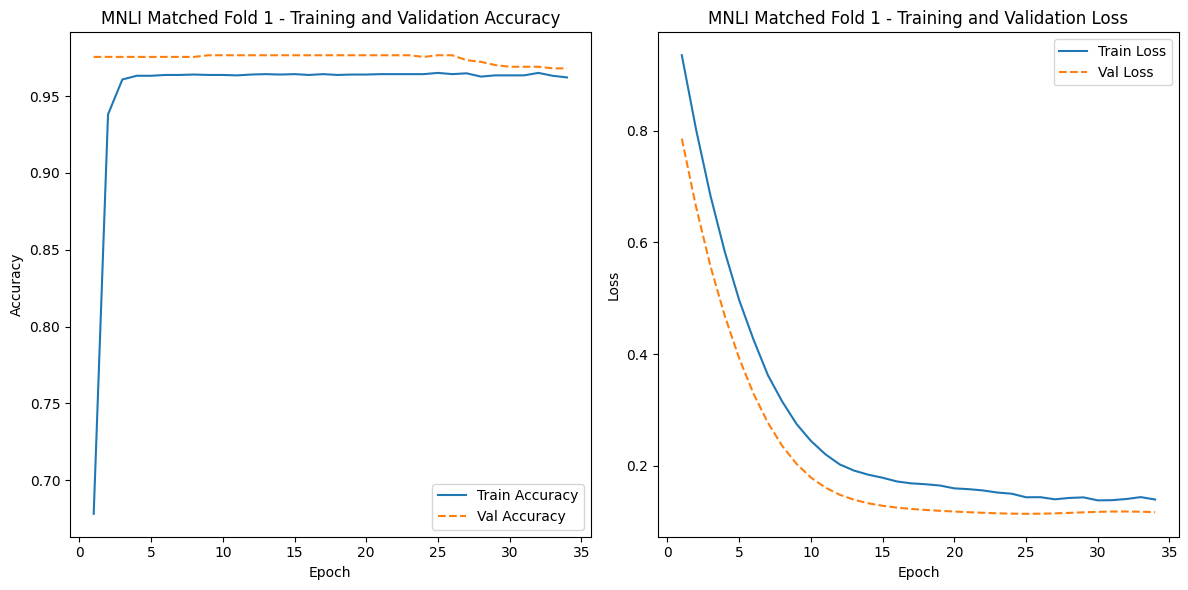

Epoch 1/100, Train Loss: 1.0279, Val Loss: 0.8472, Val Accuracy: 0.9691
Epoch 2/100, Train Loss: 0.8626, Val Loss: 0.7019, Val Accuracy: 0.9691
Epoch 3/100, Train Loss: 0.7152, Val Loss: 0.5780, Val Accuracy: 0.9691
Epoch 4/100, Train Loss: 0.5923, Val Loss: 0.4757, Val Accuracy: 0.9691
Epoch 5/100, Train Loss: 0.4936, Val Loss: 0.3923, Val Accuracy: 0.9691
Epoch 6/100, Train Loss: 0.4097, Val Loss: 0.3265, Val Accuracy: 0.9691
Epoch 7/100, Train Loss: 0.3465, Val Loss: 0.2751, Val Accuracy: 0.9691
Epoch 8/100, Train Loss: 0.2979, Val Loss: 0.2359, Val Accuracy: 0.9691
Epoch 9/100, Train Loss: 0.2598, Val Loss: 0.2067, Val Accuracy: 0.9691
Epoch 10/100, Train Loss: 0.2292, Val Loss: 0.1856, Val Accuracy: 0.9701
Epoch 11/100, Train Loss: 0.2083, Val Loss: 0.1707, Val Accuracy: 0.9701
Epoch 12/100, Train Loss: 0.1944, Val Loss: 0.1604, Val Accuracy: 0.9701
Epoch 13/100, Train Loss: 0.1878, Val Loss: 0.1534, Val Accuracy: 0.9701
Epoch 14/100, Train Loss: 0.1782, Val Loss: 0.1485, Val Accu

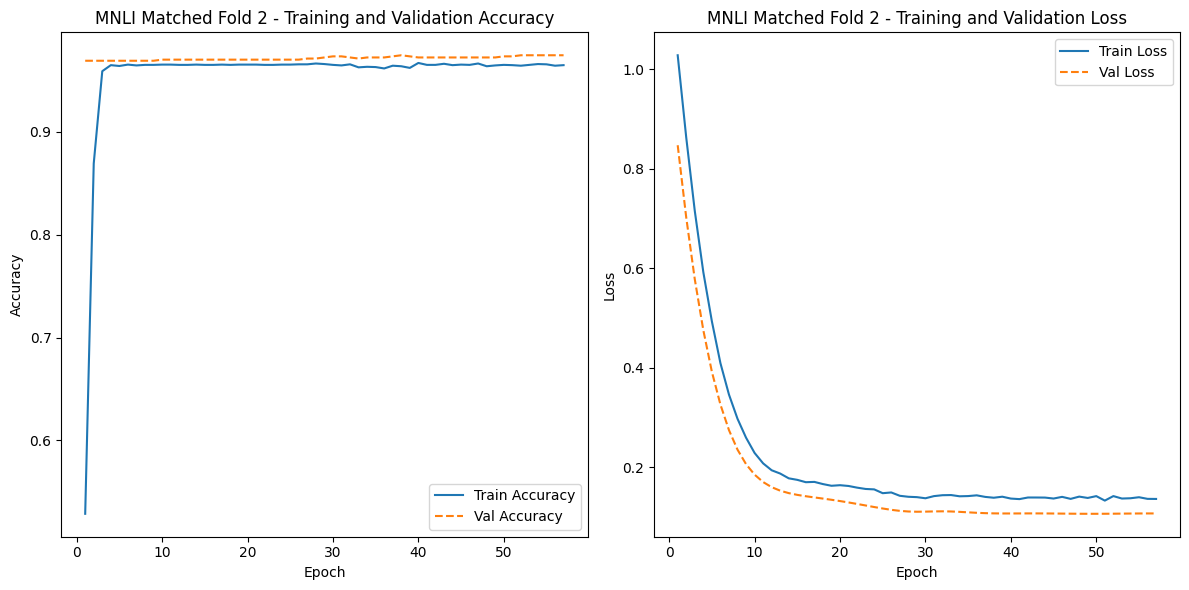

Epoch 1/100, Train Loss: 1.2104, Val Loss: 1.0002, Val Accuracy: 0.5208
Epoch 2/100, Train Loss: 1.0205, Val Loss: 0.8406, Val Accuracy: 0.9530
Epoch 3/100, Train Loss: 0.8520, Val Loss: 0.7046, Val Accuracy: 0.9616
Epoch 4/100, Train Loss: 0.7166, Val Loss: 0.5903, Val Accuracy: 0.9616
Epoch 5/100, Train Loss: 0.5999, Val Loss: 0.4945, Val Accuracy: 0.9616
Epoch 6/100, Train Loss: 0.5005, Val Loss: 0.4153, Val Accuracy: 0.9616
Epoch 7/100, Train Loss: 0.4198, Val Loss: 0.3517, Val Accuracy: 0.9616
Epoch 8/100, Train Loss: 0.3544, Val Loss: 0.3020, Val Accuracy: 0.9616
Epoch 9/100, Train Loss: 0.2996, Val Loss: 0.2638, Val Accuracy: 0.9616
Epoch 10/100, Train Loss: 0.2589, Val Loss: 0.2353, Val Accuracy: 0.9616
Epoch 11/100, Train Loss: 0.2287, Val Loss: 0.2149, Val Accuracy: 0.9616
Epoch 12/100, Train Loss: 0.2066, Val Loss: 0.2008, Val Accuracy: 0.9616
Epoch 13/100, Train Loss: 0.1898, Val Loss: 0.1913, Val Accuracy: 0.9616
Epoch 14/100, Train Loss: 0.1772, Val Loss: 0.1854, Val Accu

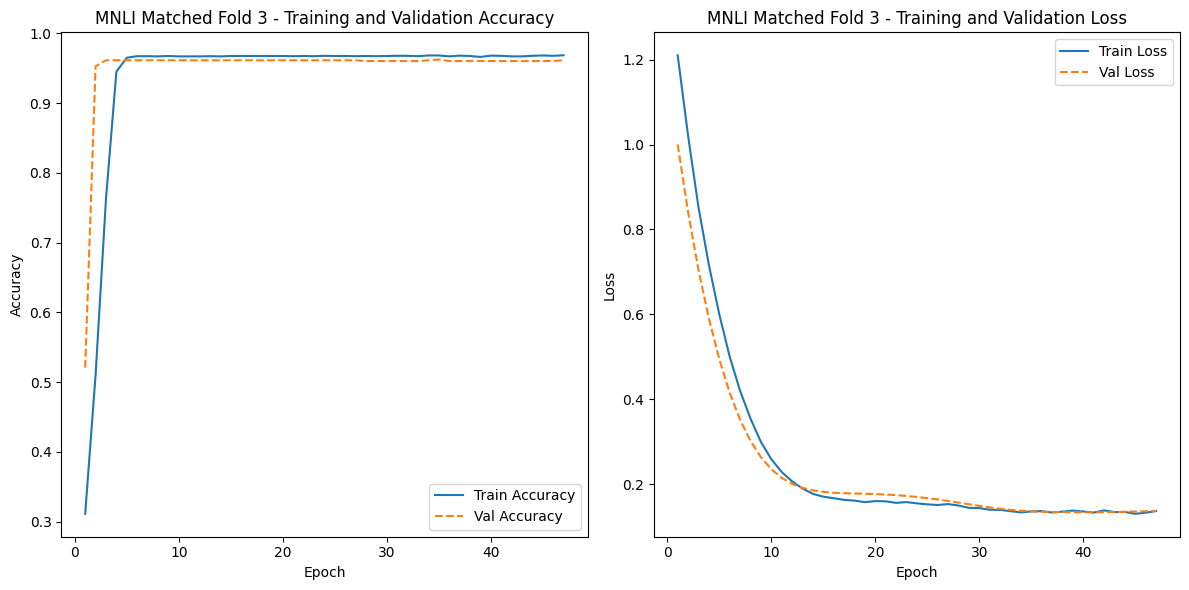

Epoch 1/100, Train Loss: 1.1281, Val Loss: 0.9665, Val Accuracy: 0.5101
Epoch 2/100, Train Loss: 0.9743, Val Loss: 0.8329, Val Accuracy: 0.9616
Epoch 3/100, Train Loss: 0.8431, Val Loss: 0.7162, Val Accuracy: 0.9626
Epoch 4/100, Train Loss: 0.7248, Val Loss: 0.6158, Val Accuracy: 0.9626
Epoch 5/100, Train Loss: 0.6230, Val Loss: 0.5282, Val Accuracy: 0.9626
Epoch 6/100, Train Loss: 0.5330, Val Loss: 0.4524, Val Accuracy: 0.9626
Epoch 7/100, Train Loss: 0.4548, Val Loss: 0.3878, Val Accuracy: 0.9626
Epoch 8/100, Train Loss: 0.3904, Val Loss: 0.3343, Val Accuracy: 0.9626
Epoch 9/100, Train Loss: 0.3334, Val Loss: 0.2913, Val Accuracy: 0.9626
Epoch 10/100, Train Loss: 0.2892, Val Loss: 0.2577, Val Accuracy: 0.9626
Epoch 11/100, Train Loss: 0.2581, Val Loss: 0.2323, Val Accuracy: 0.9626
Epoch 12/100, Train Loss: 0.2302, Val Loss: 0.2136, Val Accuracy: 0.9626
Epoch 13/100, Train Loss: 0.2074, Val Loss: 0.2002, Val Accuracy: 0.9626
Epoch 14/100, Train Loss: 0.1927, Val Loss: 0.1909, Val Accu

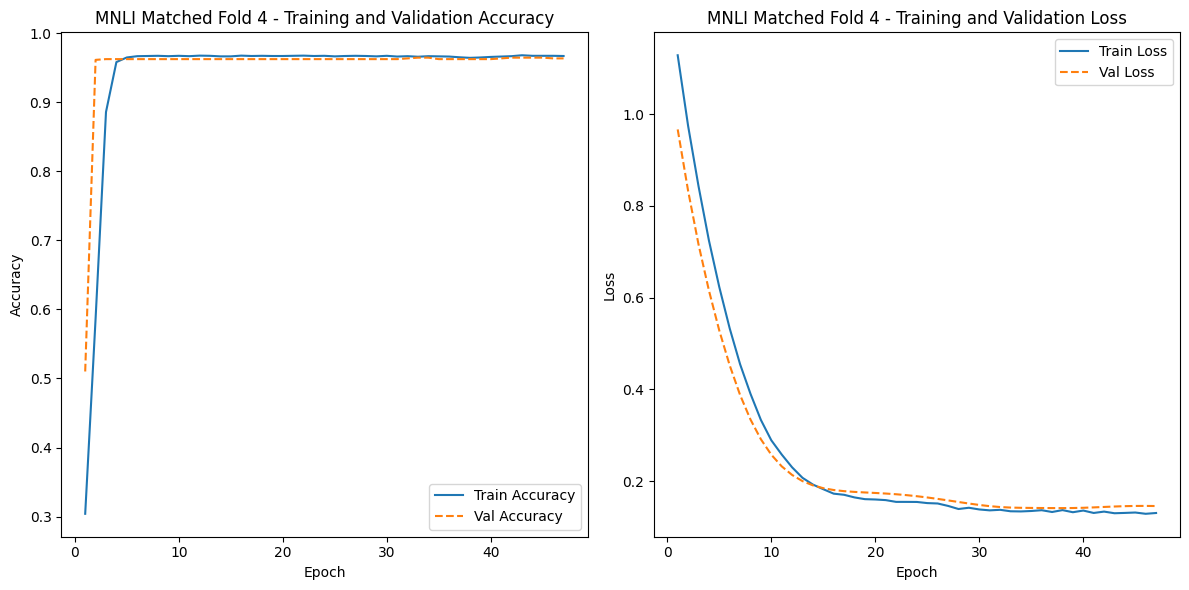

Epoch 1/100, Train Loss: 1.2061, Val Loss: 1.0298, Val Accuracy: 0.4647
Epoch 2/100, Train Loss: 1.0377, Val Loss: 0.8868, Val Accuracy: 0.9594
Epoch 3/100, Train Loss: 0.8955, Val Loss: 0.7600, Val Accuracy: 0.9615
Epoch 4/100, Train Loss: 0.7699, Val Loss: 0.6488, Val Accuracy: 0.9615
Epoch 5/100, Train Loss: 0.6534, Val Loss: 0.5527, Val Accuracy: 0.9615
Epoch 6/100, Train Loss: 0.5585, Val Loss: 0.4692, Val Accuracy: 0.9615
Epoch 7/100, Train Loss: 0.4744, Val Loss: 0.3973, Val Accuracy: 0.9615
Epoch 8/100, Train Loss: 0.3995, Val Loss: 0.3378, Val Accuracy: 0.9626
Epoch 9/100, Train Loss: 0.3386, Val Loss: 0.2908, Val Accuracy: 0.9626
Epoch 10/100, Train Loss: 0.2904, Val Loss: 0.2549, Val Accuracy: 0.9626
Epoch 11/100, Train Loss: 0.2496, Val Loss: 0.2283, Val Accuracy: 0.9626
Epoch 12/100, Train Loss: 0.2226, Val Loss: 0.2094, Val Accuracy: 0.9626
Epoch 13/100, Train Loss: 0.2003, Val Loss: 0.1967, Val Accuracy: 0.9626
Epoch 14/100, Train Loss: 0.1852, Val Loss: 0.1887, Val Accu

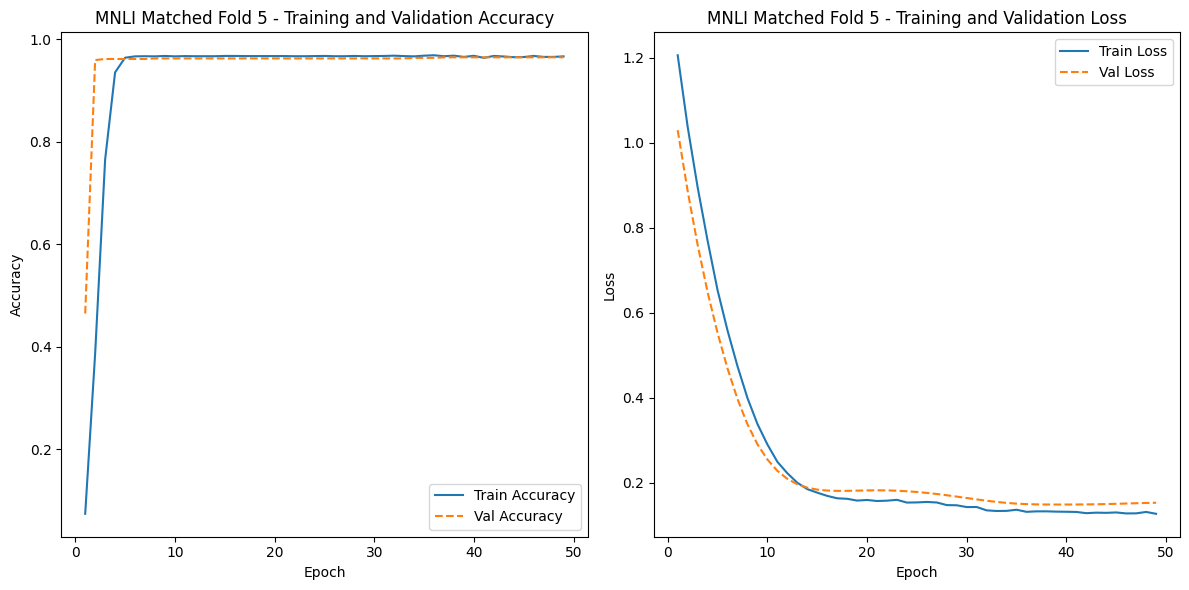

Average Validation Loss for MNLI Matched across 5 folds: 0.1321
Average Validation Accuracy for MNLI Matched across 5 folds: 0.9665


In [53]:
# Task: MNLI Matched
task_name = 'MNLI Matched'
X_train = X_train_mnli_matched
y_train = y_train_mnli_matched
avg_val_loss_mnli_matched, avg_val_accuracy_mnli_matched = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.2802, Val Loss: 1.0654, Val Accuracy: 0.0275
Epoch 2/100, Train Loss: 1.0723, Val Loss: 0.8880, Val Accuracy: 0.9651
Epoch 3/100, Train Loss: 0.8977, Val Loss: 0.7374, Val Accuracy: 0.9704
Epoch 4/100, Train Loss: 0.7480, Val Loss: 0.6086, Val Accuracy: 0.9704
Epoch 5/100, Train Loss: 0.6221, Val Loss: 0.5019, Val Accuracy: 0.9704
Epoch 6/100, Train Loss: 0.5185, Val Loss: 0.4144, Val Accuracy: 0.9704
Epoch 7/100, Train Loss: 0.4330, Val Loss: 0.3442, Val Accuracy: 0.9704
Epoch 8/100, Train Loss: 0.3647, Val Loss: 0.2891, Val Accuracy: 0.9704
Epoch 9/100, Train Loss: 0.3129, Val Loss: 0.2466, Val Accuracy: 0.9704
Epoch 10/100, Train Loss: 0.2688, Val Loss: 0.2147, Val Accuracy: 0.9704
Epoch 11/100, Train Loss: 0.2371, Val Loss: 0.1912, Val Accuracy: 0.9704
Epoch 12/100, Train Loss: 0.2193, Val Loss: 0.1741, Val Accuracy: 0.9704
Epoch 13/100, Train Loss: 0.2004, Val Loss: 0.1621, Val Accuracy: 0.9704
Epoch 14/100, Train Loss: 0.1887, Val Loss: 0.1537, Val Accu

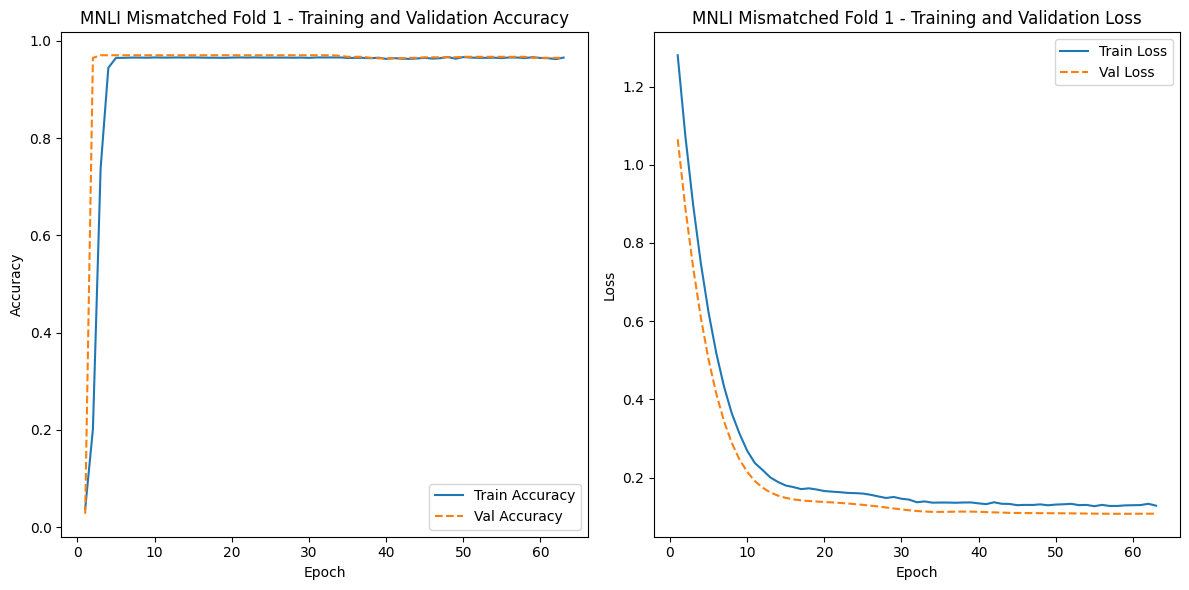

Epoch 1/100, Train Loss: 1.2150, Val Loss: 1.0270, Val Accuracy: 0.5074
Epoch 2/100, Train Loss: 1.0318, Val Loss: 0.8696, Val Accuracy: 0.9567
Epoch 3/100, Train Loss: 0.8727, Val Loss: 0.7305, Val Accuracy: 0.9567
Epoch 4/100, Train Loss: 0.7290, Val Loss: 0.6115, Val Accuracy: 0.9567
Epoch 5/100, Train Loss: 0.6062, Val Loss: 0.5124, Val Accuracy: 0.9567
Epoch 6/100, Train Loss: 0.5048, Val Loss: 0.4317, Val Accuracy: 0.9567
Epoch 7/100, Train Loss: 0.4177, Val Loss: 0.3675, Val Accuracy: 0.9567
Epoch 8/100, Train Loss: 0.3499, Val Loss: 0.3180, Val Accuracy: 0.9567
Epoch 9/100, Train Loss: 0.2945, Val Loss: 0.2804, Val Accuracy: 0.9567
Epoch 10/100, Train Loss: 0.2546, Val Loss: 0.2529, Val Accuracy: 0.9567
Epoch 11/100, Train Loss: 0.2192, Val Loss: 0.2336, Val Accuracy: 0.9567
Epoch 12/100, Train Loss: 0.1974, Val Loss: 0.2206, Val Accuracy: 0.9567
Epoch 13/100, Train Loss: 0.1791, Val Loss: 0.2124, Val Accuracy: 0.9567
Epoch 14/100, Train Loss: 0.1664, Val Loss: 0.2076, Val Accu

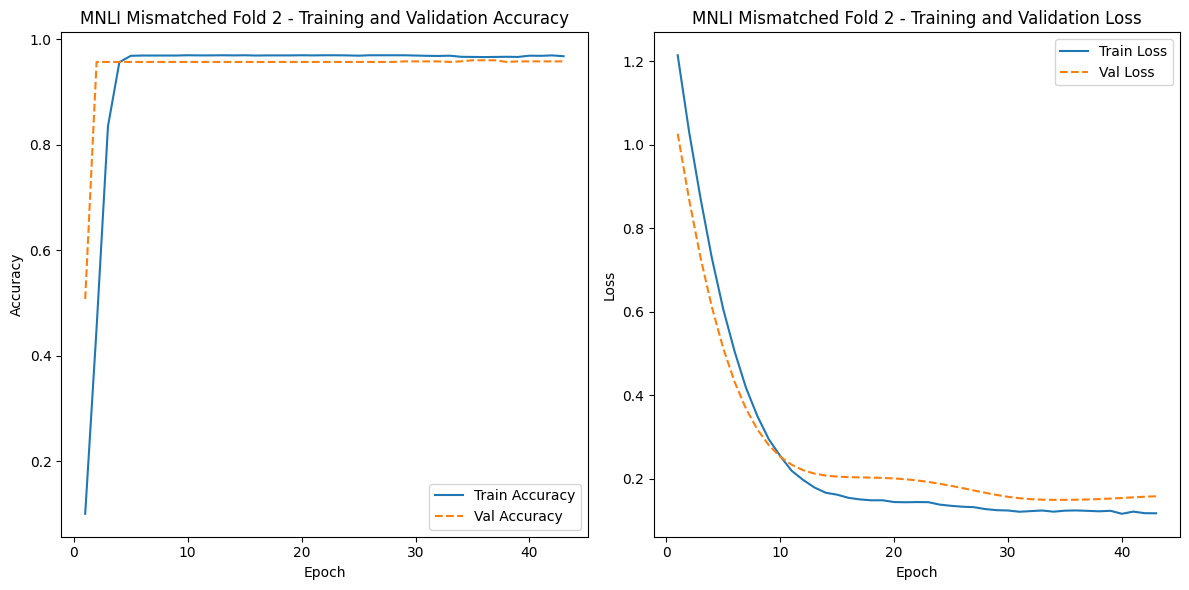

Epoch 1/100, Train Loss: 1.0193, Val Loss: 0.8608, Val Accuracy: 0.9482
Epoch 2/100, Train Loss: 0.8653, Val Loss: 0.7270, Val Accuracy: 0.9609
Epoch 3/100, Train Loss: 0.7299, Val Loss: 0.6125, Val Accuracy: 0.9619
Epoch 4/100, Train Loss: 0.6146, Val Loss: 0.5159, Val Accuracy: 0.9619
Epoch 5/100, Train Loss: 0.5141, Val Loss: 0.4353, Val Accuracy: 0.9619
Epoch 6/100, Train Loss: 0.4339, Val Loss: 0.3691, Val Accuracy: 0.9630
Epoch 7/100, Train Loss: 0.3678, Val Loss: 0.3162, Val Accuracy: 0.9630
Epoch 8/100, Train Loss: 0.3124, Val Loss: 0.2752, Val Accuracy: 0.9630
Epoch 9/100, Train Loss: 0.2673, Val Loss: 0.2442, Val Accuracy: 0.9630
Epoch 10/100, Train Loss: 0.2368, Val Loss: 0.2214, Val Accuracy: 0.9630
Epoch 11/100, Train Loss: 0.2122, Val Loss: 0.2052, Val Accuracy: 0.9630
Epoch 12/100, Train Loss: 0.1922, Val Loss: 0.1941, Val Accuracy: 0.9630
Epoch 13/100, Train Loss: 0.1807, Val Loss: 0.1867, Val Accuracy: 0.9630
Epoch 14/100, Train Loss: 0.1725, Val Loss: 0.1820, Val Accu

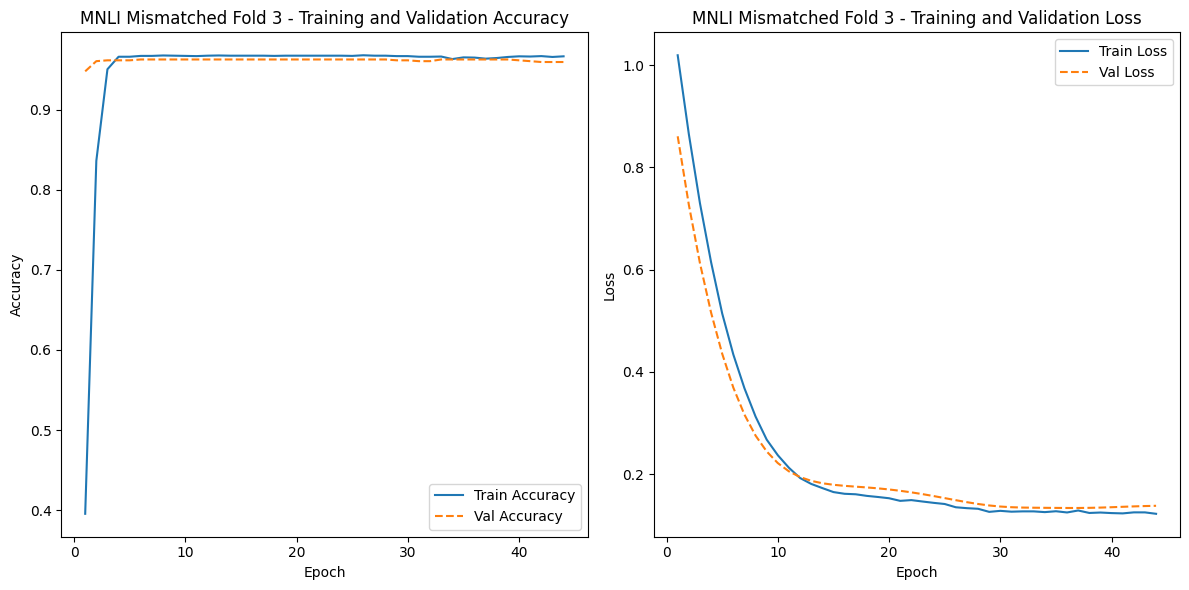

Epoch 1/100, Train Loss: 1.1915, Val Loss: 0.9895, Val Accuracy: 0.9651
Epoch 2/100, Train Loss: 1.0003, Val Loss: 0.8153, Val Accuracy: 0.9757
Epoch 3/100, Train Loss: 0.8248, Val Loss: 0.6667, Val Accuracy: 0.9746
Epoch 4/100, Train Loss: 0.6830, Val Loss: 0.5414, Val Accuracy: 0.9746
Epoch 5/100, Train Loss: 0.5602, Val Loss: 0.4380, Val Accuracy: 0.9746
Epoch 6/100, Train Loss: 0.4599, Val Loss: 0.3548, Val Accuracy: 0.9746
Epoch 7/100, Train Loss: 0.3809, Val Loss: 0.2904, Val Accuracy: 0.9746
Epoch 8/100, Train Loss: 0.3201, Val Loss: 0.2418, Val Accuracy: 0.9746
Epoch 9/100, Train Loss: 0.2726, Val Loss: 0.2056, Val Accuracy: 0.9746
Epoch 10/100, Train Loss: 0.2405, Val Loss: 0.1792, Val Accuracy: 0.9746
Epoch 11/100, Train Loss: 0.2150, Val Loss: 0.1605, Val Accuracy: 0.9746
Epoch 12/100, Train Loss: 0.1956, Val Loss: 0.1476, Val Accuracy: 0.9746
Epoch 13/100, Train Loss: 0.1881, Val Loss: 0.1388, Val Accuracy: 0.9746
Epoch 14/100, Train Loss: 0.1791, Val Loss: 0.1331, Val Accu

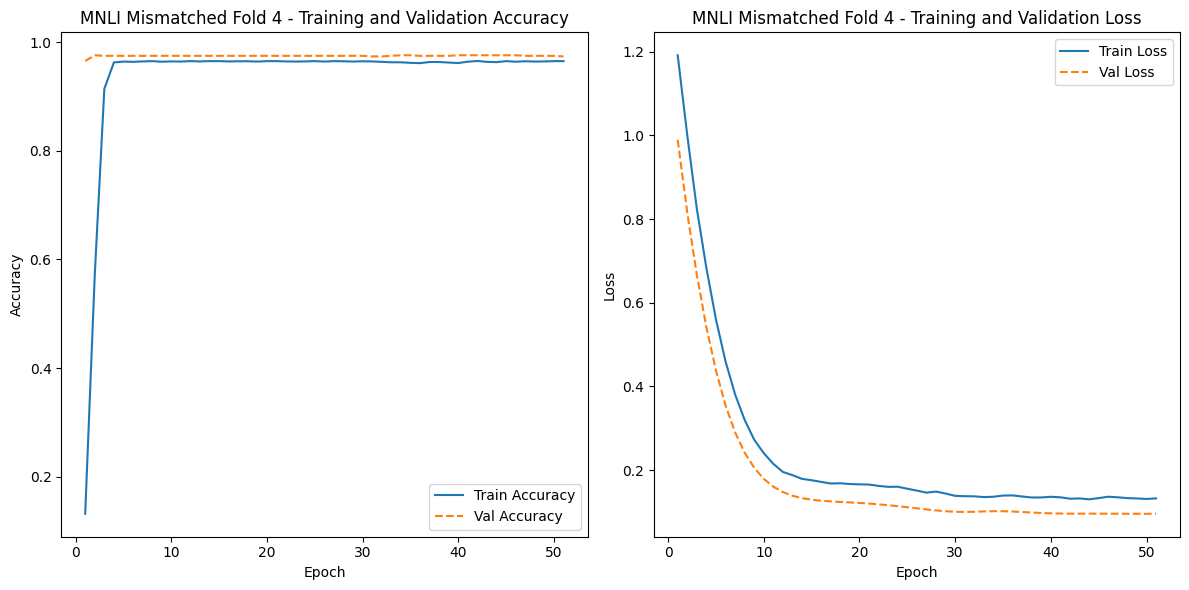

Epoch 1/100, Train Loss: 1.1068, Val Loss: 0.9396, Val Accuracy: 0.4857
Epoch 2/100, Train Loss: 0.9510, Val Loss: 0.8010, Val Accuracy: 0.9693
Epoch 3/100, Train Loss: 0.8163, Val Loss: 0.6787, Val Accuracy: 0.9693
Epoch 4/100, Train Loss: 0.6918, Val Loss: 0.5734, Val Accuracy: 0.9693
Epoch 5/100, Train Loss: 0.5899, Val Loss: 0.4833, Val Accuracy: 0.9693
Epoch 6/100, Train Loss: 0.5006, Val Loss: 0.4074, Val Accuracy: 0.9693
Epoch 7/100, Train Loss: 0.4229, Val Loss: 0.3448, Val Accuracy: 0.9693
Epoch 8/100, Train Loss: 0.3629, Val Loss: 0.2943, Val Accuracy: 0.9693
Epoch 9/100, Train Loss: 0.3102, Val Loss: 0.2542, Val Accuracy: 0.9693
Epoch 10/100, Train Loss: 0.2725, Val Loss: 0.2231, Val Accuracy: 0.9693
Epoch 11/100, Train Loss: 0.2428, Val Loss: 0.1994, Val Accuracy: 0.9693
Epoch 12/100, Train Loss: 0.2188, Val Loss: 0.1818, Val Accuracy: 0.9693
Epoch 13/100, Train Loss: 0.2008, Val Loss: 0.1690, Val Accuracy: 0.9693
Epoch 14/100, Train Loss: 0.1911, Val Loss: 0.1601, Val Accu

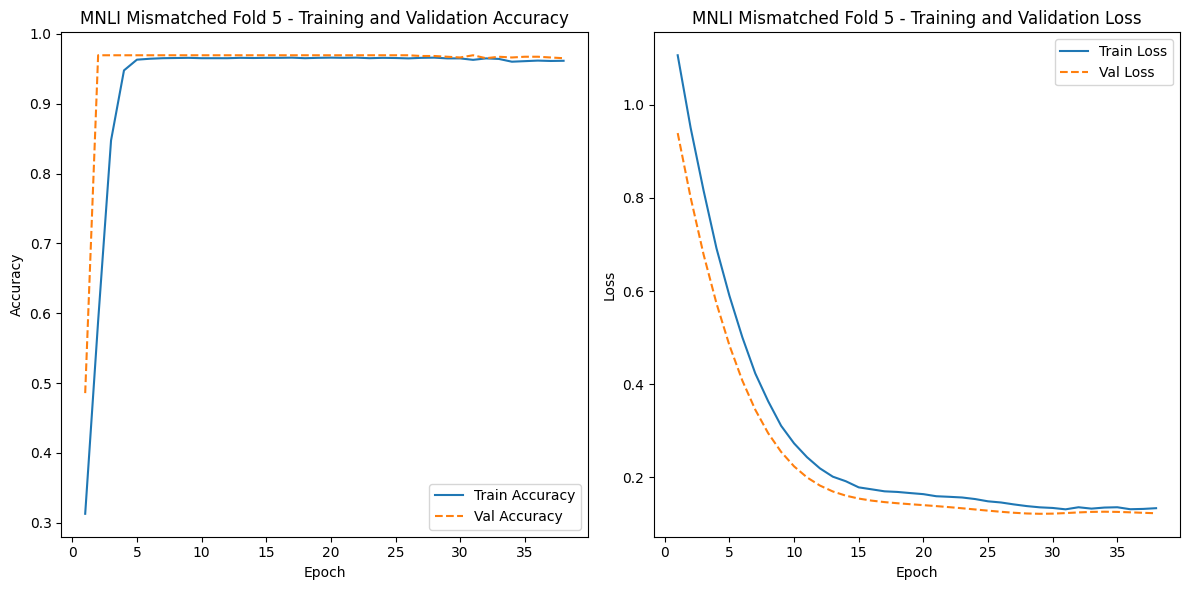

Average Validation Loss for MNLI Mismatched across 5 folds: 0.1243
Average Validation Accuracy for MNLI Mismatched across 5 folds: 0.9643


In [54]:
# Task: MNLI Mismatched
task_name = 'MNLI Mismatched'
X_train = X_train_mnli_mismatched
y_train = y_train_mnli_mismatched
avg_val_loss_mnli_mismatched, avg_val_accuracy_mnli_mismatched = cross_validate(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.1073, Val Loss: 1.0277, Val Accuracy: 0.4559
Epoch 2/100, Train Loss: 1.0074, Val Loss: 0.9475, Val Accuracy: 0.5588
Epoch 3/100, Train Loss: 0.9345, Val Loss: 0.8807, Val Accuracy: 0.6618
Epoch 4/100, Train Loss: 0.8545, Val Loss: 0.8244, Val Accuracy: 0.6765
Epoch 5/100, Train Loss: 0.8142, Val Loss: 0.7768, Val Accuracy: 0.7059
Epoch 6/100, Train Loss: 0.7627, Val Loss: 0.7380, Val Accuracy: 0.7206
Epoch 7/100, Train Loss: 0.7058, Val Loss: 0.7066, Val Accuracy: 0.7353
Epoch 8/100, Train Loss: 0.6843, Val Loss: 0.6812, Val Accuracy: 0.7353
Epoch 9/100, Train Loss: 0.6494, Val Loss: 0.6612, Val Accuracy: 0.7353
Epoch 10/100, Train Loss: 0.6090, Val Loss: 0.6464, Val Accuracy: 0.7500
Epoch 11/100, Train Loss: 0.6031, Val Loss: 0.6360, Val Accuracy: 0.7500
Epoch 12/100, Train Loss: 0.5699, Val Loss: 0.6289, Val Accuracy: 0.7500
Epoch 13/100, Train Loss: 0.5577, Val Loss: 0.6246, Val Accuracy: 0.7500
Epoch 14/100, Train Loss: 0.5402, Val Loss: 0.6220, Val Accu

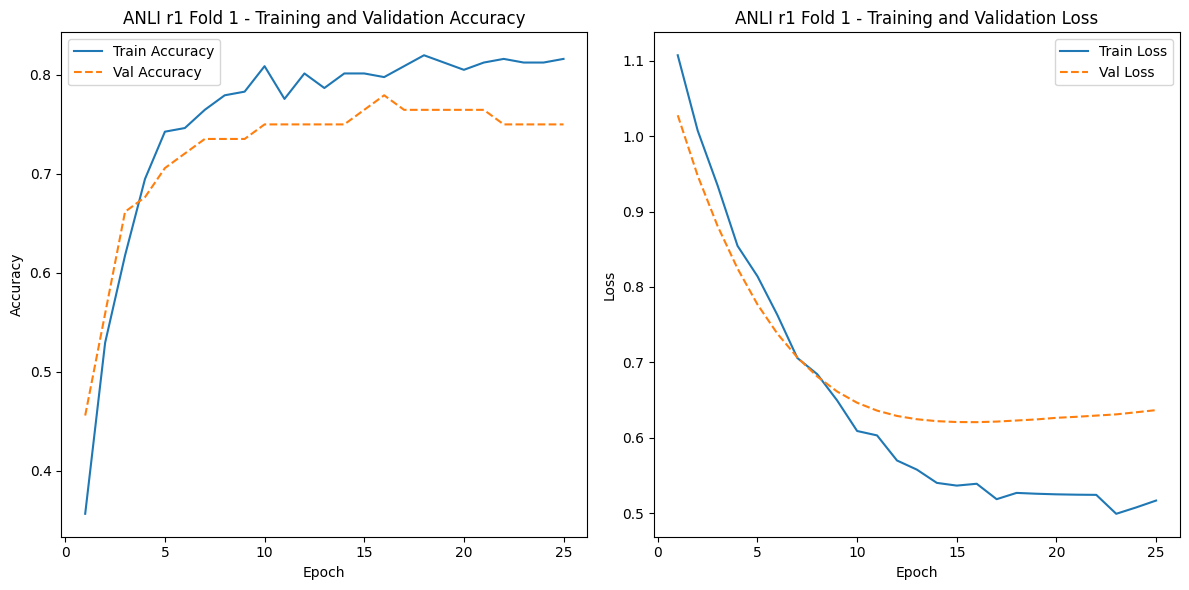

Epoch 1/100, Train Loss: 1.1167, Val Loss: 1.0344, Val Accuracy: 0.6324
Epoch 2/100, Train Loss: 1.0406, Val Loss: 0.9543, Val Accuracy: 0.6324
Epoch 3/100, Train Loss: 0.9688, Val Loss: 0.8828, Val Accuracy: 0.6618
Epoch 4/100, Train Loss: 0.9059, Val Loss: 0.8182, Val Accuracy: 0.6765
Epoch 5/100, Train Loss: 0.8532, Val Loss: 0.7604, Val Accuracy: 0.7353
Epoch 6/100, Train Loss: 0.7924, Val Loss: 0.7101, Val Accuracy: 0.7794
Epoch 7/100, Train Loss: 0.7587, Val Loss: 0.6669, Val Accuracy: 0.7794
Epoch 8/100, Train Loss: 0.7015, Val Loss: 0.6304, Val Accuracy: 0.7794
Epoch 9/100, Train Loss: 0.6821, Val Loss: 0.6000, Val Accuracy: 0.7794
Epoch 10/100, Train Loss: 0.6537, Val Loss: 0.5752, Val Accuracy: 0.7647
Epoch 11/100, Train Loss: 0.6304, Val Loss: 0.5559, Val Accuracy: 0.7794
Epoch 12/100, Train Loss: 0.6165, Val Loss: 0.5413, Val Accuracy: 0.8088
Epoch 13/100, Train Loss: 0.5902, Val Loss: 0.5307, Val Accuracy: 0.8088
Epoch 14/100, Train Loss: 0.5926, Val Loss: 0.5239, Val Accu

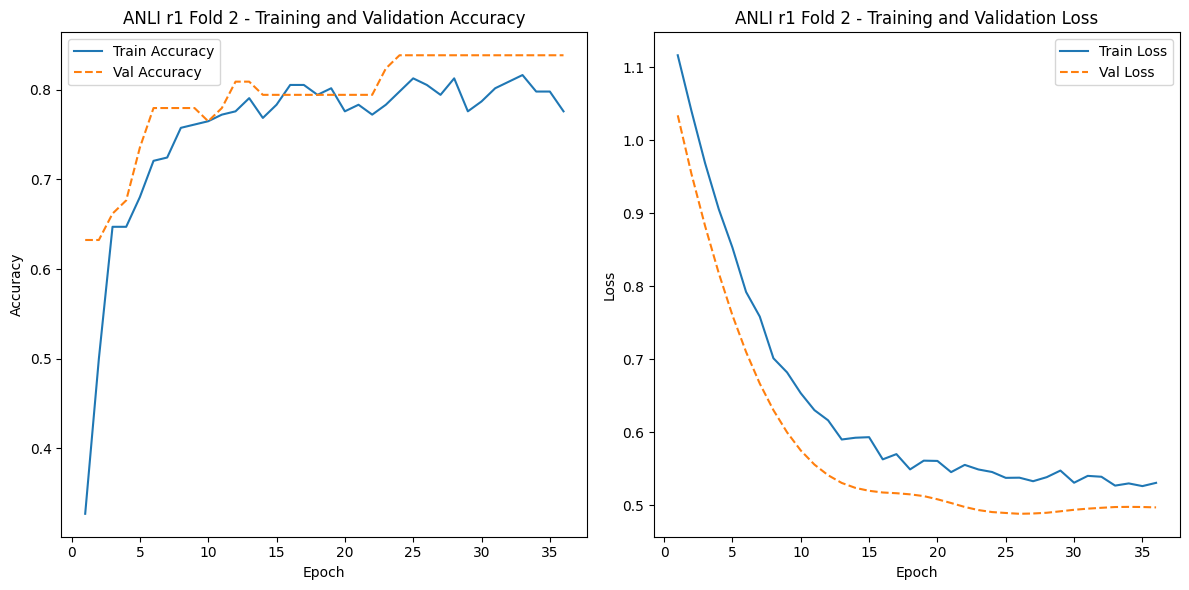

Epoch 1/100, Train Loss: 1.1059, Val Loss: 1.0177, Val Accuracy: 0.4559
Epoch 2/100, Train Loss: 1.0111, Val Loss: 0.9327, Val Accuracy: 0.7206
Epoch 3/100, Train Loss: 0.9217, Val Loss: 0.8633, Val Accuracy: 0.7794
Epoch 4/100, Train Loss: 0.8546, Val Loss: 0.8057, Val Accuracy: 0.7794
Epoch 5/100, Train Loss: 0.7833, Val Loss: 0.7582, Val Accuracy: 0.7941
Epoch 6/100, Train Loss: 0.7424, Val Loss: 0.7205, Val Accuracy: 0.7941
Epoch 7/100, Train Loss: 0.6942, Val Loss: 0.6914, Val Accuracy: 0.7941
Epoch 8/100, Train Loss: 0.6624, Val Loss: 0.6694, Val Accuracy: 0.7941
Epoch 9/100, Train Loss: 0.6122, Val Loss: 0.6533, Val Accuracy: 0.8088
Epoch 10/100, Train Loss: 0.6060, Val Loss: 0.6420, Val Accuracy: 0.8088
Epoch 11/100, Train Loss: 0.5702, Val Loss: 0.6348, Val Accuracy: 0.8088
Epoch 12/100, Train Loss: 0.5611, Val Loss: 0.6313, Val Accuracy: 0.8088
Epoch 13/100, Train Loss: 0.5388, Val Loss: 0.6309, Val Accuracy: 0.7794
Epoch 14/100, Train Loss: 0.5409, Val Loss: 0.6330, Val Accu

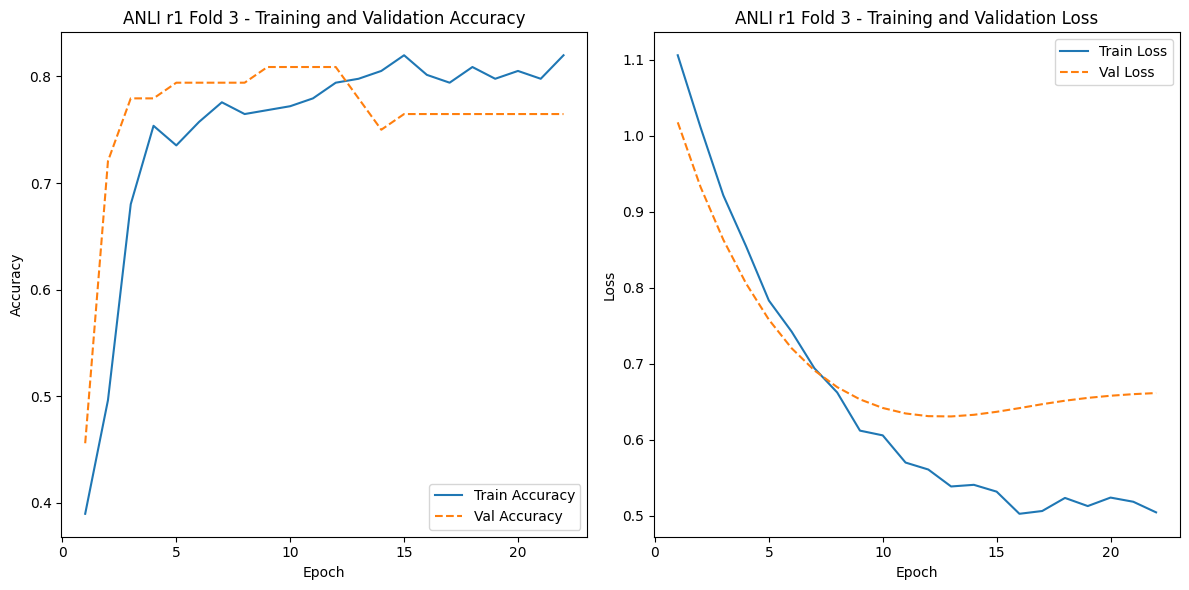

Epoch 1/100, Train Loss: 1.0893, Val Loss: 0.9826, Val Accuracy: 0.6471
Epoch 2/100, Train Loss: 0.9974, Val Loss: 0.9185, Val Accuracy: 0.6912
Epoch 3/100, Train Loss: 0.9212, Val Loss: 0.8630, Val Accuracy: 0.6912
Epoch 4/100, Train Loss: 0.8573, Val Loss: 0.8151, Val Accuracy: 0.6912
Epoch 5/100, Train Loss: 0.7951, Val Loss: 0.7737, Val Accuracy: 0.7500
Epoch 6/100, Train Loss: 0.7548, Val Loss: 0.7389, Val Accuracy: 0.7500
Epoch 7/100, Train Loss: 0.7094, Val Loss: 0.7100, Val Accuracy: 0.7500
Epoch 8/100, Train Loss: 0.6694, Val Loss: 0.6870, Val Accuracy: 0.7500
Epoch 9/100, Train Loss: 0.6305, Val Loss: 0.6694, Val Accuracy: 0.7353
Epoch 10/100, Train Loss: 0.6091, Val Loss: 0.6563, Val Accuracy: 0.7206
Epoch 11/100, Train Loss: 0.5798, Val Loss: 0.6472, Val Accuracy: 0.7206
Epoch 12/100, Train Loss: 0.5737, Val Loss: 0.6415, Val Accuracy: 0.7059
Epoch 13/100, Train Loss: 0.5620, Val Loss: 0.6388, Val Accuracy: 0.7206
Epoch 14/100, Train Loss: 0.5516, Val Loss: 0.6384, Val Accu

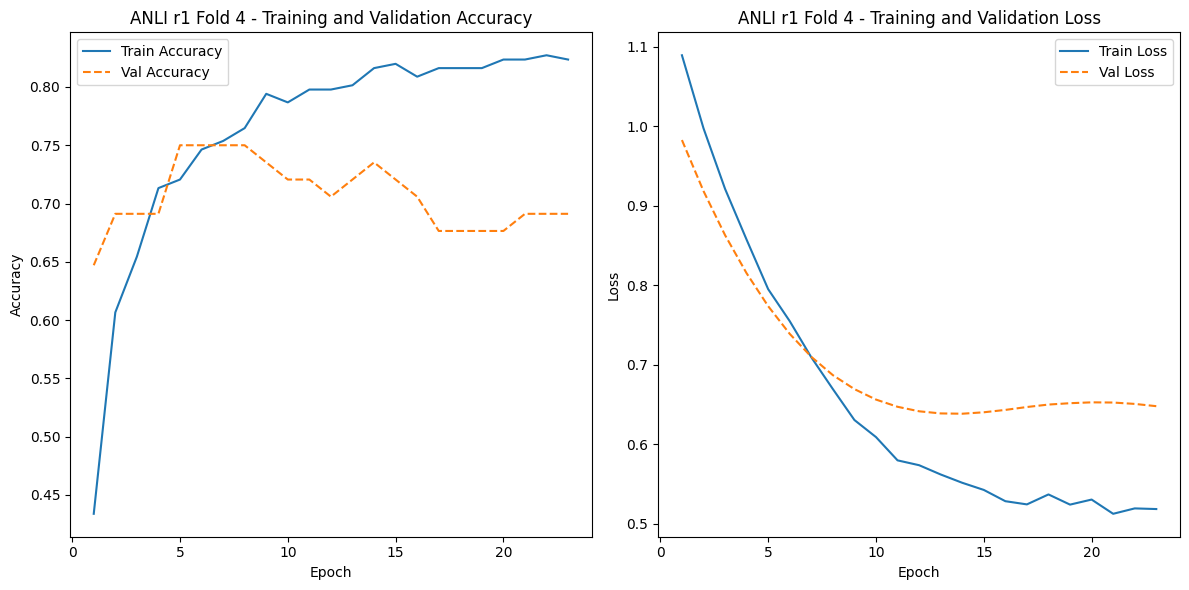

Epoch 1/100, Train Loss: 1.0495, Val Loss: 0.9763, Val Accuracy: 0.6618
Epoch 2/100, Train Loss: 0.9507, Val Loss: 0.9052, Val Accuracy: 0.6618
Epoch 3/100, Train Loss: 0.8710, Val Loss: 0.8436, Val Accuracy: 0.6618
Epoch 4/100, Train Loss: 0.8315, Val Loss: 0.7891, Val Accuracy: 0.6618
Epoch 5/100, Train Loss: 0.7822, Val Loss: 0.7408, Val Accuracy: 0.6471
Epoch 6/100, Train Loss: 0.7462, Val Loss: 0.6974, Val Accuracy: 0.6471
Epoch 7/100, Train Loss: 0.6991, Val Loss: 0.6579, Val Accuracy: 0.6471
Epoch 8/100, Train Loss: 0.6785, Val Loss: 0.6215, Val Accuracy: 0.6471
Epoch 9/100, Train Loss: 0.6646, Val Loss: 0.5878, Val Accuracy: 0.7059
Epoch 10/100, Train Loss: 0.6365, Val Loss: 0.5575, Val Accuracy: 0.7794
Epoch 11/100, Train Loss: 0.6315, Val Loss: 0.5299, Val Accuracy: 0.7794
Epoch 12/100, Train Loss: 0.6278, Val Loss: 0.5052, Val Accuracy: 0.8235
Epoch 13/100, Train Loss: 0.6149, Val Loss: 0.4839, Val Accuracy: 0.8235
Epoch 14/100, Train Loss: 0.5902, Val Loss: 0.4662, Val Accu

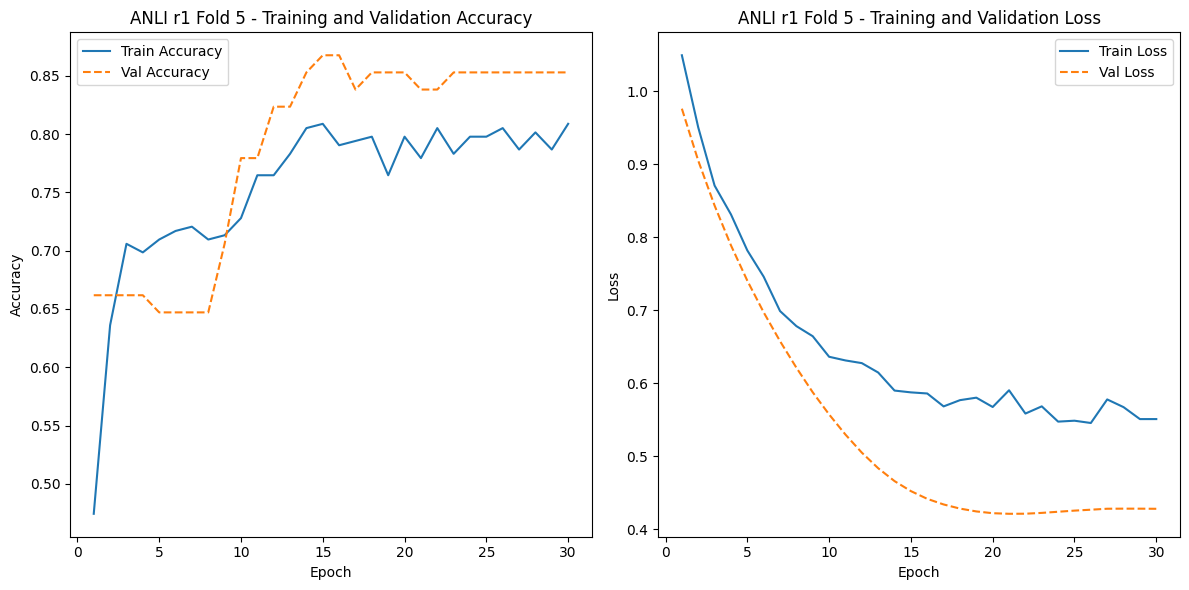

Average Validation Loss for ANLI r1 across 5 folds: 0.5743
Average Validation Accuracy for ANLI r1 across 5 folds: 0.7794


In [55]:
# Task: ANLI r1
task_name = 'ANLI r1'
X_train = X_train_anli_r1
y_train = y_train_anli_r1
avg_val_loss_anli_r1, avg_val_accuracy_anli_r1 = cross_validate(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.1006, Val Loss: 1.0227, Val Accuracy: 0.5556
Epoch 2/100, Train Loss: 1.0032, Val Loss: 0.9600, Val Accuracy: 0.6250
Epoch 3/100, Train Loss: 0.9636, Val Loss: 0.9092, Val Accuracy: 0.6806
Epoch 4/100, Train Loss: 0.9080, Val Loss: 0.8685, Val Accuracy: 0.6667
Epoch 5/100, Train Loss: 0.8670, Val Loss: 0.8364, Val Accuracy: 0.6806
Epoch 6/100, Train Loss: 0.8285, Val Loss: 0.8117, Val Accuracy: 0.6806
Epoch 7/100, Train Loss: 0.8024, Val Loss: 0.7925, Val Accuracy: 0.7222
Epoch 8/100, Train Loss: 0.7801, Val Loss: 0.7787, Val Accuracy: 0.7361
Epoch 9/100, Train Loss: 0.7548, Val Loss: 0.7697, Val Accuracy: 0.7222
Epoch 10/100, Train Loss: 0.7417, Val Loss: 0.7632, Val Accuracy: 0.7361
Epoch 11/100, Train Loss: 0.7137, Val Loss: 0.7588, Val Accuracy: 0.7222
Epoch 12/100, Train Loss: 0.7388, Val Loss: 0.7559, Val Accuracy: 0.7222
Epoch 13/100, Train Loss: 0.7042, Val Loss: 0.7544, Val Accuracy: 0.7222
Epoch 14/100, Train Loss: 0.7079, Val Loss: 0.7530, Val Accu

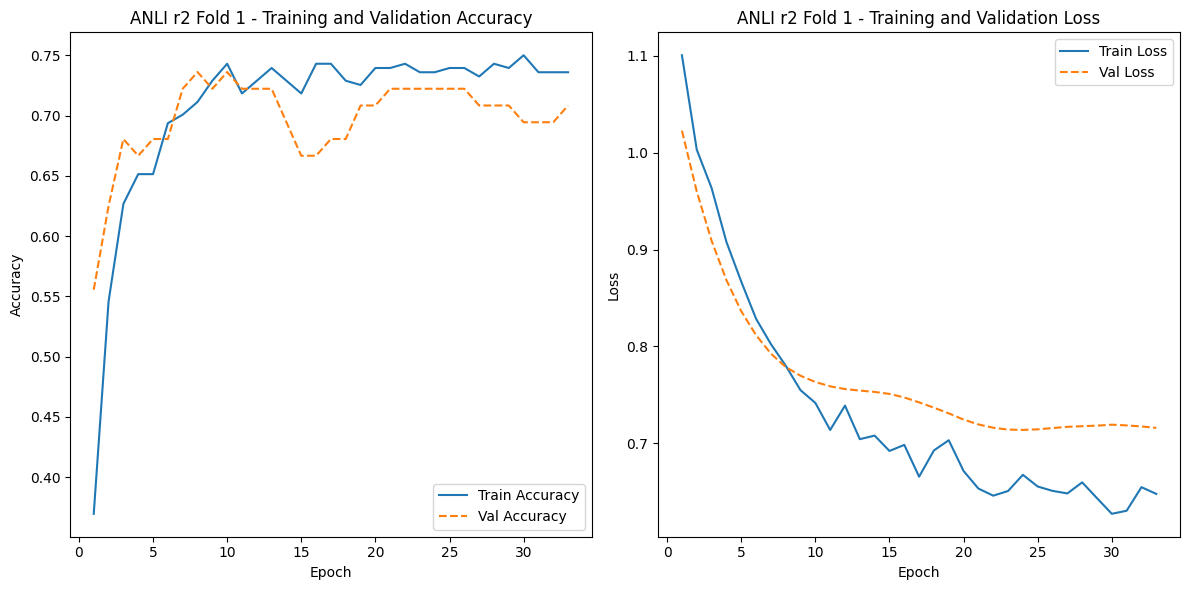

Epoch 1/100, Train Loss: 1.0352, Val Loss: 0.9741, Val Accuracy: 0.7042
Epoch 2/100, Train Loss: 0.9695, Val Loss: 0.9112, Val Accuracy: 0.6901
Epoch 3/100, Train Loss: 0.9260, Val Loss: 0.8590, Val Accuracy: 0.7183
Epoch 4/100, Train Loss: 0.8771, Val Loss: 0.8155, Val Accuracy: 0.7042
Epoch 5/100, Train Loss: 0.8408, Val Loss: 0.7794, Val Accuracy: 0.6901
Epoch 6/100, Train Loss: 0.8093, Val Loss: 0.7496, Val Accuracy: 0.6761
Epoch 7/100, Train Loss: 0.7802, Val Loss: 0.7252, Val Accuracy: 0.6761
Epoch 8/100, Train Loss: 0.7550, Val Loss: 0.7056, Val Accuracy: 0.7042
Epoch 9/100, Train Loss: 0.7262, Val Loss: 0.6908, Val Accuracy: 0.7324
Epoch 10/100, Train Loss: 0.7179, Val Loss: 0.6807, Val Accuracy: 0.7465
Epoch 11/100, Train Loss: 0.6988, Val Loss: 0.6751, Val Accuracy: 0.7324
Epoch 12/100, Train Loss: 0.6917, Val Loss: 0.6733, Val Accuracy: 0.7465
Epoch 13/100, Train Loss: 0.6909, Val Loss: 0.6743, Val Accuracy: 0.7606
Epoch 14/100, Train Loss: 0.6772, Val Loss: 0.6770, Val Accu

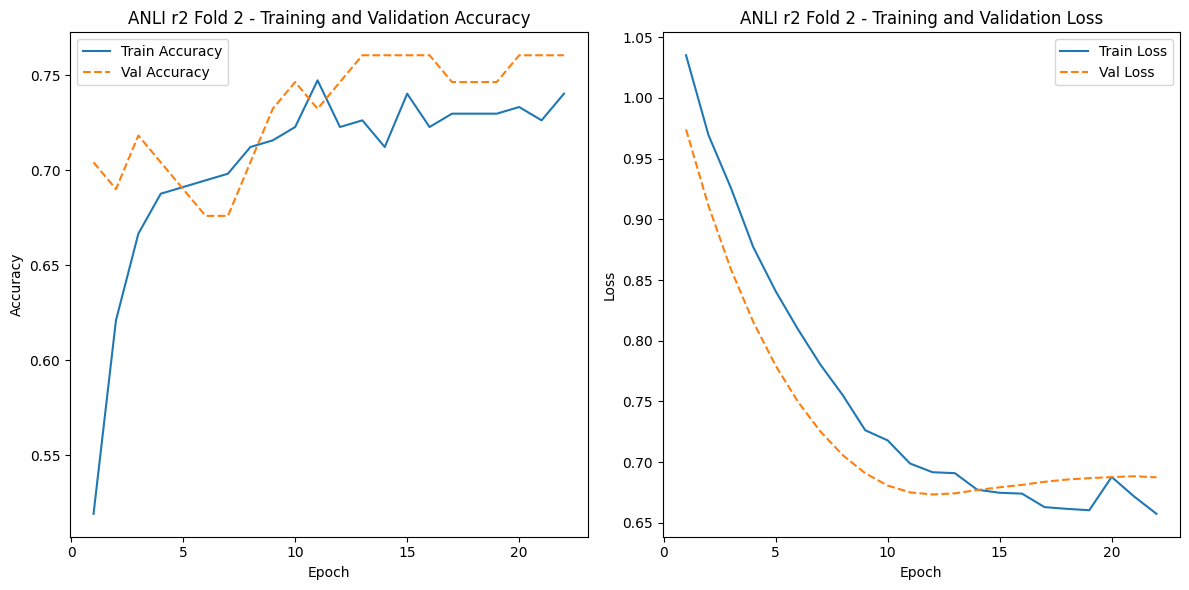

Epoch 1/100, Train Loss: 1.1628, Val Loss: 1.1066, Val Accuracy: 0.2958
Epoch 2/100, Train Loss: 1.0723, Val Loss: 1.0471, Val Accuracy: 0.5634
Epoch 3/100, Train Loss: 1.0121, Val Loss: 0.9991, Val Accuracy: 0.5915
Epoch 4/100, Train Loss: 0.9554, Val Loss: 0.9599, Val Accuracy: 0.6197
Epoch 5/100, Train Loss: 0.9115, Val Loss: 0.9293, Val Accuracy: 0.6197
Epoch 6/100, Train Loss: 0.8720, Val Loss: 0.9052, Val Accuracy: 0.6197
Epoch 7/100, Train Loss: 0.8315, Val Loss: 0.8857, Val Accuracy: 0.6197
Epoch 8/100, Train Loss: 0.7970, Val Loss: 0.8702, Val Accuracy: 0.6197
Epoch 9/100, Train Loss: 0.8018, Val Loss: 0.8582, Val Accuracy: 0.6197
Epoch 10/100, Train Loss: 0.7658, Val Loss: 0.8482, Val Accuracy: 0.6479
Epoch 11/100, Train Loss: 0.7591, Val Loss: 0.8396, Val Accuracy: 0.6479
Epoch 12/100, Train Loss: 0.7315, Val Loss: 0.8314, Val Accuracy: 0.6479
Epoch 13/100, Train Loss: 0.7247, Val Loss: 0.8231, Val Accuracy: 0.6761
Epoch 14/100, Train Loss: 0.7191, Val Loss: 0.8141, Val Accu

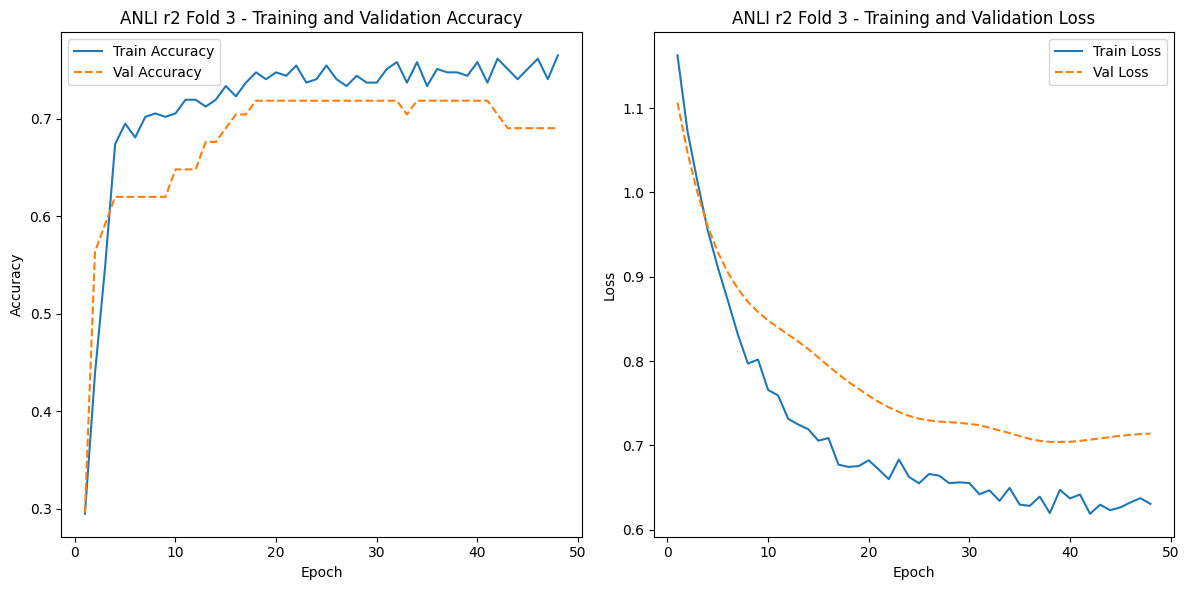

Epoch 1/100, Train Loss: 1.1469, Val Loss: 1.0606, Val Accuracy: 0.4085
Epoch 2/100, Train Loss: 1.0544, Val Loss: 1.0044, Val Accuracy: 0.6338
Epoch 3/100, Train Loss: 1.0069, Val Loss: 0.9568, Val Accuracy: 0.6338
Epoch 4/100, Train Loss: 0.9542, Val Loss: 0.9161, Val Accuracy: 0.6620
Epoch 5/100, Train Loss: 0.9160, Val Loss: 0.8801, Val Accuracy: 0.6338
Epoch 6/100, Train Loss: 0.8615, Val Loss: 0.8476, Val Accuracy: 0.6338
Epoch 7/100, Train Loss: 0.8431, Val Loss: 0.8169, Val Accuracy: 0.6901
Epoch 8/100, Train Loss: 0.8179, Val Loss: 0.7872, Val Accuracy: 0.6901
Epoch 9/100, Train Loss: 0.7905, Val Loss: 0.7592, Val Accuracy: 0.7324
Epoch 10/100, Train Loss: 0.7705, Val Loss: 0.7328, Val Accuracy: 0.7324
Epoch 11/100, Train Loss: 0.7437, Val Loss: 0.7087, Val Accuracy: 0.7606
Epoch 12/100, Train Loss: 0.7306, Val Loss: 0.6875, Val Accuracy: 0.7606
Epoch 13/100, Train Loss: 0.7230, Val Loss: 0.6693, Val Accuracy: 0.7606
Epoch 14/100, Train Loss: 0.7280, Val Loss: 0.6549, Val Accu

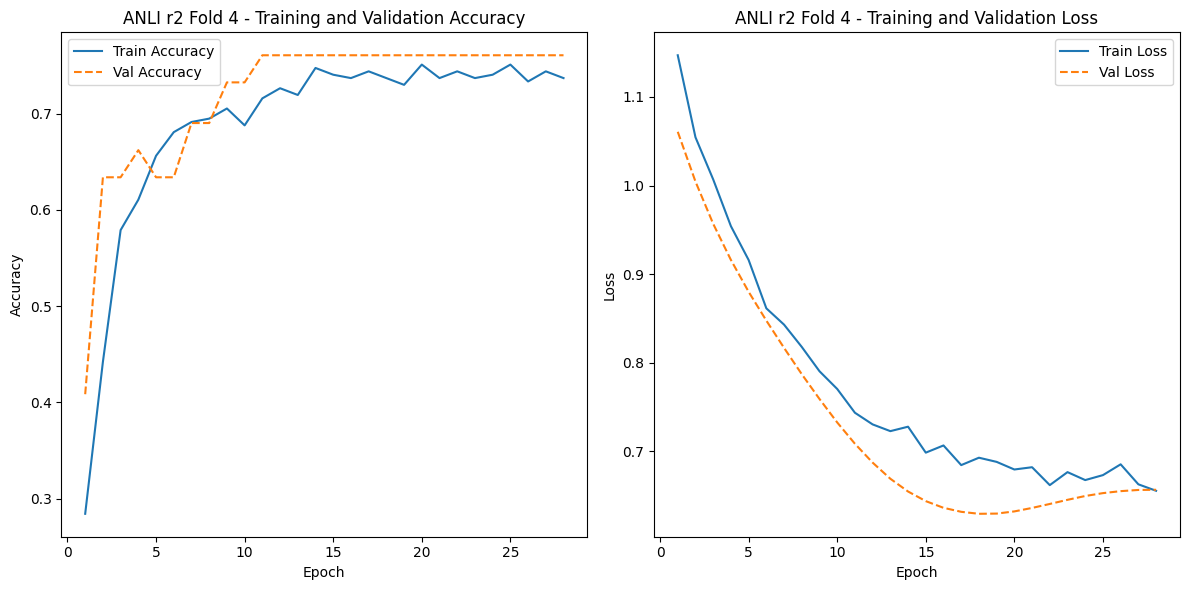

Epoch 1/100, Train Loss: 1.1818, Val Loss: 1.0726, Val Accuracy: 0.3944
Epoch 2/100, Train Loss: 1.0968, Val Loss: 1.0050, Val Accuracy: 0.6620
Epoch 3/100, Train Loss: 1.0187, Val Loss: 0.9490, Val Accuracy: 0.6761
Epoch 4/100, Train Loss: 0.9763, Val Loss: 0.9034, Val Accuracy: 0.7183
Epoch 5/100, Train Loss: 0.8999, Val Loss: 0.8661, Val Accuracy: 0.7183
Epoch 6/100, Train Loss: 0.8548, Val Loss: 0.8358, Val Accuracy: 0.7183
Epoch 7/100, Train Loss: 0.8396, Val Loss: 0.8119, Val Accuracy: 0.7183
Epoch 8/100, Train Loss: 0.7997, Val Loss: 0.7943, Val Accuracy: 0.7183
Epoch 9/100, Train Loss: 0.7792, Val Loss: 0.7813, Val Accuracy: 0.7183
Epoch 10/100, Train Loss: 0.7512, Val Loss: 0.7726, Val Accuracy: 0.7324
Epoch 11/100, Train Loss: 0.7411, Val Loss: 0.7668, Val Accuracy: 0.7324
Epoch 12/100, Train Loss: 0.7315, Val Loss: 0.7633, Val Accuracy: 0.7324
Epoch 13/100, Train Loss: 0.7271, Val Loss: 0.7615, Val Accuracy: 0.7183
Epoch 14/100, Train Loss: 0.7185, Val Loss: 0.7603, Val Accu

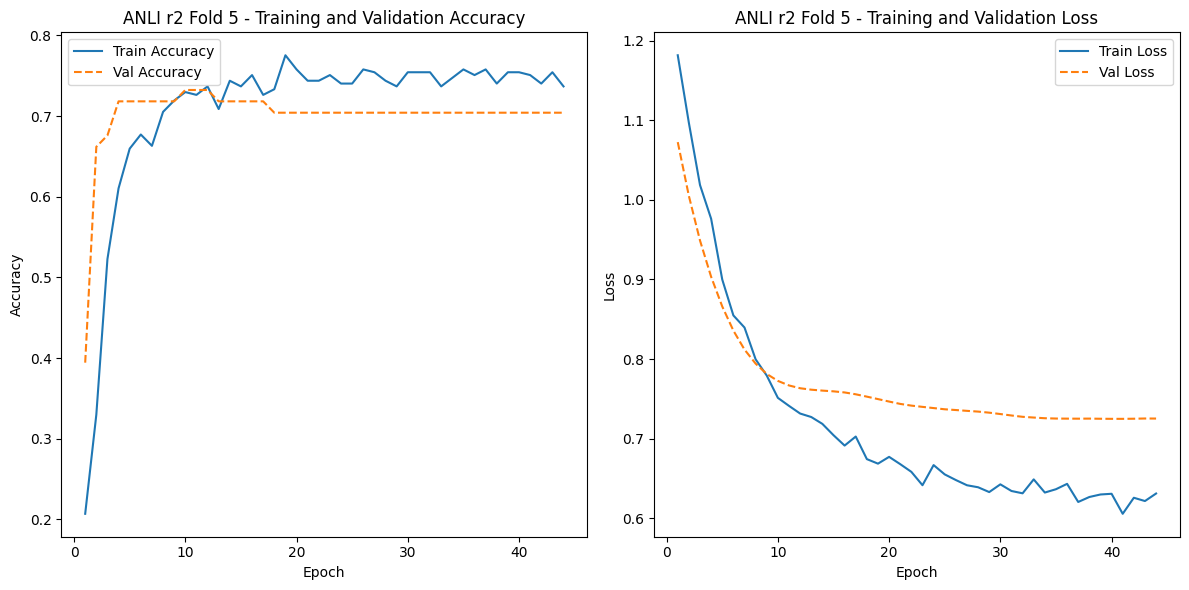

Average Validation Loss for ANLI r2 across 5 folds: 0.6998
Average Validation Accuracy for ANLI r2 across 5 folds: 0.7248


In [56]:
# Task: ANLI r2
task_name = 'ANLI r2'
X_train = X_train_anli_r2
y_train = y_train_anli_r2
avg_val_loss_anli_r2, avg_val_accuracy_anli_r2 = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.0939, Val Loss: 0.9972, Val Accuracy: 0.7765
Epoch 2/100, Train Loss: 1.0215, Val Loss: 0.9281, Val Accuracy: 0.7529
Epoch 3/100, Train Loss: 0.9675, Val Loss: 0.8679, Val Accuracy: 0.7647
Epoch 4/100, Train Loss: 0.9227, Val Loss: 0.8154, Val Accuracy: 0.7765
Epoch 5/100, Train Loss: 0.8775, Val Loss: 0.7696, Val Accuracy: 0.7765
Epoch 6/100, Train Loss: 0.8454, Val Loss: 0.7299, Val Accuracy: 0.7765
Epoch 7/100, Train Loss: 0.8111, Val Loss: 0.6953, Val Accuracy: 0.7647
Epoch 8/100, Train Loss: 0.7840, Val Loss: 0.6660, Val Accuracy: 0.7529
Epoch 9/100, Train Loss: 0.7614, Val Loss: 0.6415, Val Accuracy: 0.7529
Epoch 10/100, Train Loss: 0.7469, Val Loss: 0.6212, Val Accuracy: 0.7529
Epoch 11/100, Train Loss: 0.7225, Val Loss: 0.6046, Val Accuracy: 0.7647
Epoch 12/100, Train Loss: 0.7104, Val Loss: 0.5919, Val Accuracy: 0.7765
Epoch 13/100, Train Loss: 0.6980, Val Loss: 0.5823, Val Accuracy: 0.8000
Epoch 14/100, Train Loss: 0.6898, Val Loss: 0.5753, Val Accu

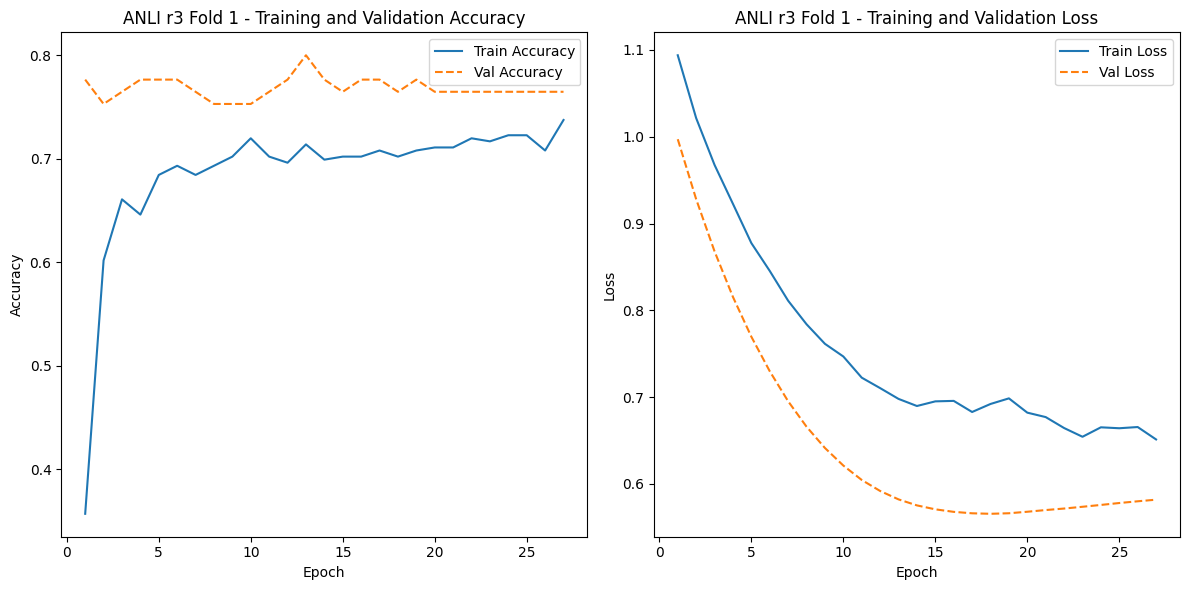

Epoch 1/100, Train Loss: 1.1374, Val Loss: 1.0217, Val Accuracy: 0.5176
Epoch 2/100, Train Loss: 1.0520, Val Loss: 0.9539, Val Accuracy: 0.6706
Epoch 3/100, Train Loss: 0.9783, Val Loss: 0.8983, Val Accuracy: 0.6706
Epoch 4/100, Train Loss: 0.9058, Val Loss: 0.8528, Val Accuracy: 0.6824
Epoch 5/100, Train Loss: 0.8522, Val Loss: 0.8164, Val Accuracy: 0.7059
Epoch 6/100, Train Loss: 0.8165, Val Loss: 0.7860, Val Accuracy: 0.7059
Epoch 7/100, Train Loss: 0.7867, Val Loss: 0.7605, Val Accuracy: 0.7059
Epoch 8/100, Train Loss: 0.7741, Val Loss: 0.7393, Val Accuracy: 0.6941
Epoch 9/100, Train Loss: 0.7354, Val Loss: 0.7228, Val Accuracy: 0.6824
Epoch 10/100, Train Loss: 0.7002, Val Loss: 0.7107, Val Accuracy: 0.6824
Epoch 11/100, Train Loss: 0.6854, Val Loss: 0.7029, Val Accuracy: 0.7059
Epoch 12/100, Train Loss: 0.7026, Val Loss: 0.6983, Val Accuracy: 0.6706
Epoch 13/100, Train Loss: 0.6747, Val Loss: 0.6953, Val Accuracy: 0.6706
Epoch 14/100, Train Loss: 0.6827, Val Loss: 0.6928, Val Accu

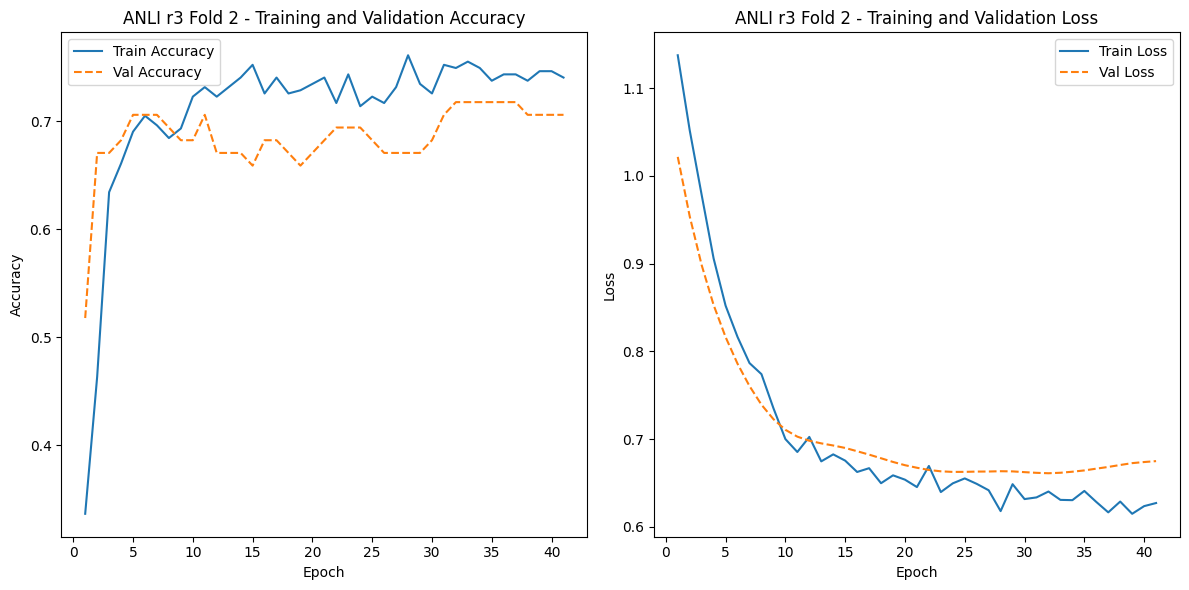

Epoch 1/100, Train Loss: 1.0294, Val Loss: 0.9296, Val Accuracy: 0.6824
Epoch 2/100, Train Loss: 0.9607, Val Loss: 0.8702, Val Accuracy: 0.6824
Epoch 3/100, Train Loss: 0.9105, Val Loss: 0.8222, Val Accuracy: 0.6824
Epoch 4/100, Train Loss: 0.8445, Val Loss: 0.7832, Val Accuracy: 0.6941
Epoch 5/100, Train Loss: 0.8114, Val Loss: 0.7524, Val Accuracy: 0.7059
Epoch 6/100, Train Loss: 0.7791, Val Loss: 0.7289, Val Accuracy: 0.7176
Epoch 7/100, Train Loss: 0.7416, Val Loss: 0.7116, Val Accuracy: 0.6941
Epoch 8/100, Train Loss: 0.7289, Val Loss: 0.6994, Val Accuracy: 0.6824
Epoch 9/100, Train Loss: 0.7154, Val Loss: 0.6914, Val Accuracy: 0.6941
Epoch 10/100, Train Loss: 0.6976, Val Loss: 0.6854, Val Accuracy: 0.6824
Epoch 11/100, Train Loss: 0.6896, Val Loss: 0.6809, Val Accuracy: 0.6706
Epoch 12/100, Train Loss: 0.6941, Val Loss: 0.6778, Val Accuracy: 0.6588
Epoch 13/100, Train Loss: 0.6817, Val Loss: 0.6752, Val Accuracy: 0.6588
Epoch 14/100, Train Loss: 0.6745, Val Loss: 0.6732, Val Accu

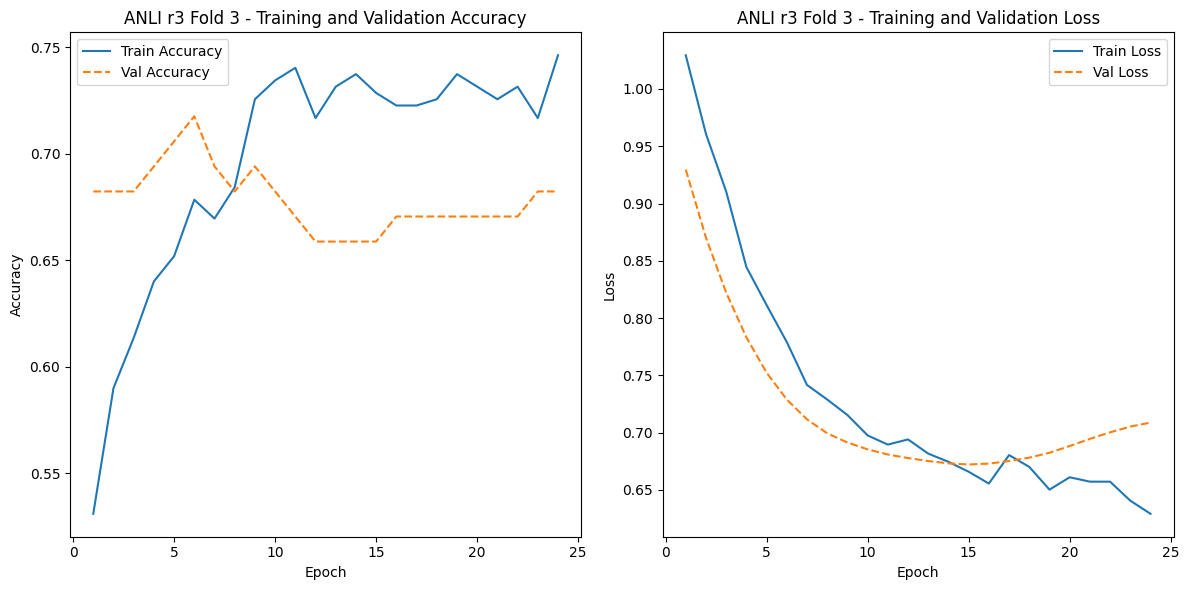

Epoch 1/100, Train Loss: 1.0974, Val Loss: 1.0327, Val Accuracy: 0.4941
Epoch 2/100, Train Loss: 1.0129, Val Loss: 0.9806, Val Accuracy: 0.5059
Epoch 3/100, Train Loss: 0.9435, Val Loss: 0.9404, Val Accuracy: 0.5529
Epoch 4/100, Train Loss: 0.8907, Val Loss: 0.9084, Val Accuracy: 0.5647
Epoch 5/100, Train Loss: 0.8158, Val Loss: 0.8820, Val Accuracy: 0.5647
Epoch 6/100, Train Loss: 0.8019, Val Loss: 0.8594, Val Accuracy: 0.5765
Epoch 7/100, Train Loss: 0.7506, Val Loss: 0.8397, Val Accuracy: 0.5647
Epoch 8/100, Train Loss: 0.7394, Val Loss: 0.8222, Val Accuracy: 0.6000
Epoch 9/100, Train Loss: 0.7065, Val Loss: 0.8077, Val Accuracy: 0.6353
Epoch 10/100, Train Loss: 0.6966, Val Loss: 0.7962, Val Accuracy: 0.6588
Epoch 11/100, Train Loss: 0.6810, Val Loss: 0.7879, Val Accuracy: 0.6471
Epoch 12/100, Train Loss: 0.6839, Val Loss: 0.7821, Val Accuracy: 0.6471
Epoch 13/100, Train Loss: 0.6625, Val Loss: 0.7779, Val Accuracy: 0.6588
Epoch 14/100, Train Loss: 0.6513, Val Loss: 0.7751, Val Accu

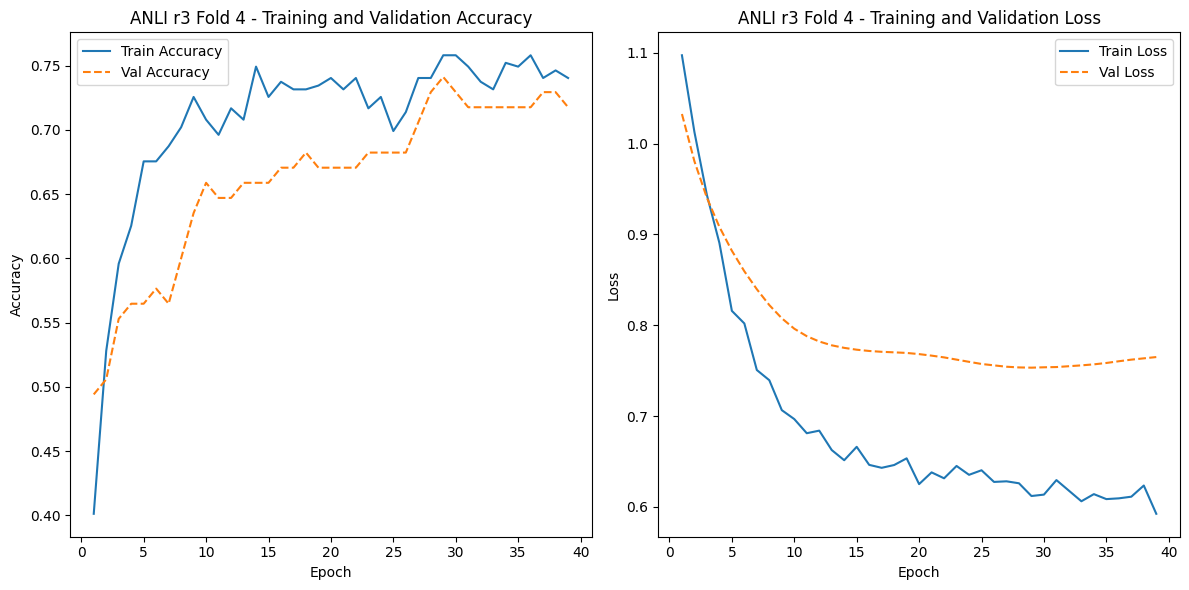

Epoch 1/100, Train Loss: 1.2862, Val Loss: 1.1588, Val Accuracy: 0.3333
Epoch 2/100, Train Loss: 1.1478, Val Loss: 1.0578, Val Accuracy: 0.4643
Epoch 3/100, Train Loss: 1.0381, Val Loss: 0.9814, Val Accuracy: 0.3929
Epoch 4/100, Train Loss: 0.9473, Val Loss: 0.9262, Val Accuracy: 0.6071
Epoch 5/100, Train Loss: 0.9081, Val Loss: 0.8894, Val Accuracy: 0.6190
Epoch 6/100, Train Loss: 0.8576, Val Loss: 0.8662, Val Accuracy: 0.6190
Epoch 7/100, Train Loss: 0.8085, Val Loss: 0.8521, Val Accuracy: 0.6190
Epoch 8/100, Train Loss: 0.8058, Val Loss: 0.8421, Val Accuracy: 0.6190
Epoch 9/100, Train Loss: 0.7707, Val Loss: 0.8329, Val Accuracy: 0.6190
Epoch 10/100, Train Loss: 0.7657, Val Loss: 0.8220, Val Accuracy: 0.6190
Epoch 11/100, Train Loss: 0.7483, Val Loss: 0.8096, Val Accuracy: 0.6190
Epoch 12/100, Train Loss: 0.7279, Val Loss: 0.7961, Val Accuracy: 0.6190
Epoch 13/100, Train Loss: 0.7079, Val Loss: 0.7823, Val Accuracy: 0.6786
Epoch 14/100, Train Loss: 0.6808, Val Loss: 0.7698, Val Accu

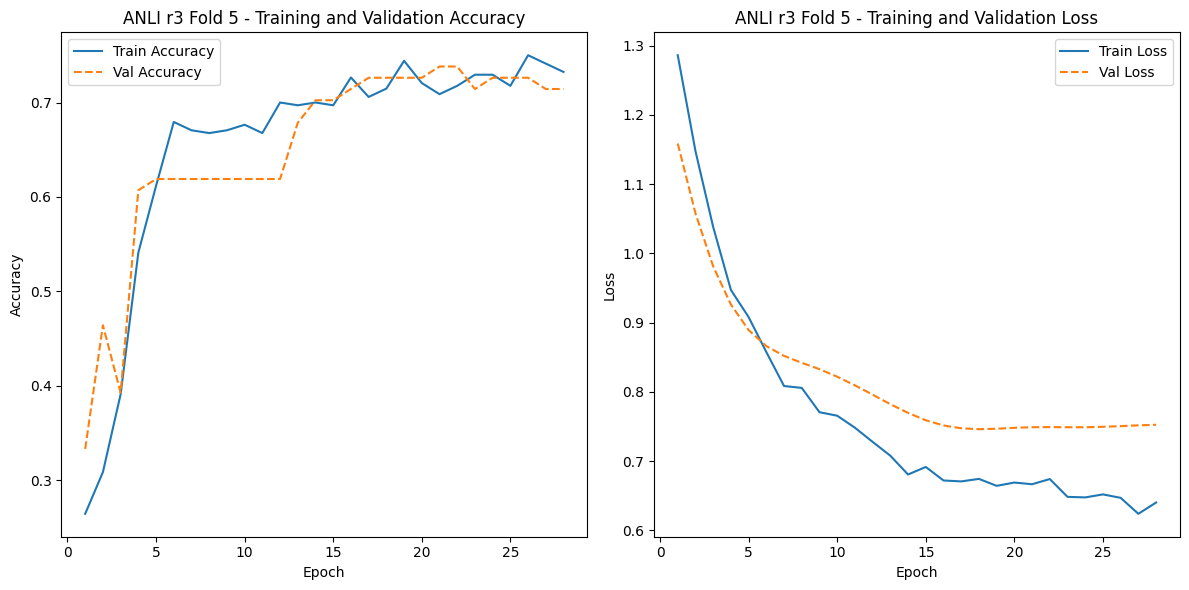

Average Validation Loss for ANLI r3 across 5 folds: 0.6967
Average Validation Accuracy for ANLI r3 across 5 folds: 0.7170


In [58]:
# Task: ANLI r3
task_name = 'ANLI r3'
X_train = X_train_anli_r3
y_train = y_train_anli_r3
avg_val_loss_anli_r3, avg_val_accuracy_anli_r3 = cross_validate(task_name, X_train, y_train)

Epoch 1/100, Train Loss: 1.0793, Val Loss: 0.9007, Val Accuracy: 0.8486
Epoch 2/100, Train Loss: 0.9100, Val Loss: 0.7556, Val Accuracy: 0.9326
Epoch 3/100, Train Loss: 0.7652, Val Loss: 0.6336, Val Accuracy: 0.9404


/tmp/ipykernel_34/3761694434.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 4/100, Train Loss: 0.6431, Val Loss: 0.5329, Val Accuracy: 0.9411
Epoch 5/100, Train Loss: 0.5441, Val Loss: 0.4509, Val Accuracy: 0.9411
Epoch 6/100, Train Loss: 0.4610, Val Loss: 0.3862, Val Accuracy: 0.9411
Epoch 7/100, Train Loss: 0.3969, Val Loss: 0.3362, Val Accuracy: 0.9414
Epoch 8/100, Train Loss: 0.3456, Val Loss: 0.2981, Val Accuracy: 0.9417
Epoch 9/100, Train Loss: 0.3074, Val Loss: 0.2697, Val Accuracy: 0.9424
Epoch 10/100, Train Loss: 0.2801, Val Loss: 0.2487, Val Accuracy: 0.9430
Epoch 11/100, Train Loss: 0.2581, Val Loss: 0.2334, Val Accuracy: 0.9430
Epoch 12/100, Train Loss: 0.2427, Val Loss: 0.2222, Val Accuracy: 0.9430
Epoch 13/100, Train Loss: 0.2319, Val Loss: 0.2138, Val Accuracy: 0.9427
Epoch 14/100, Train Loss: 0.2238, Val Loss: 0.2073, Val Accuracy: 0.9427
Epoch 15/100, Train Loss: 0.2179, Val Loss: 0.2018, Val Accuracy: 0.9427
Epoch 16/100, Train Loss: 0.2108, Val Loss: 0.1969, Val Accuracy: 0.9427
Epoch 17/100, Train Loss: 0.2062, Val Loss: 0.1921, Val A

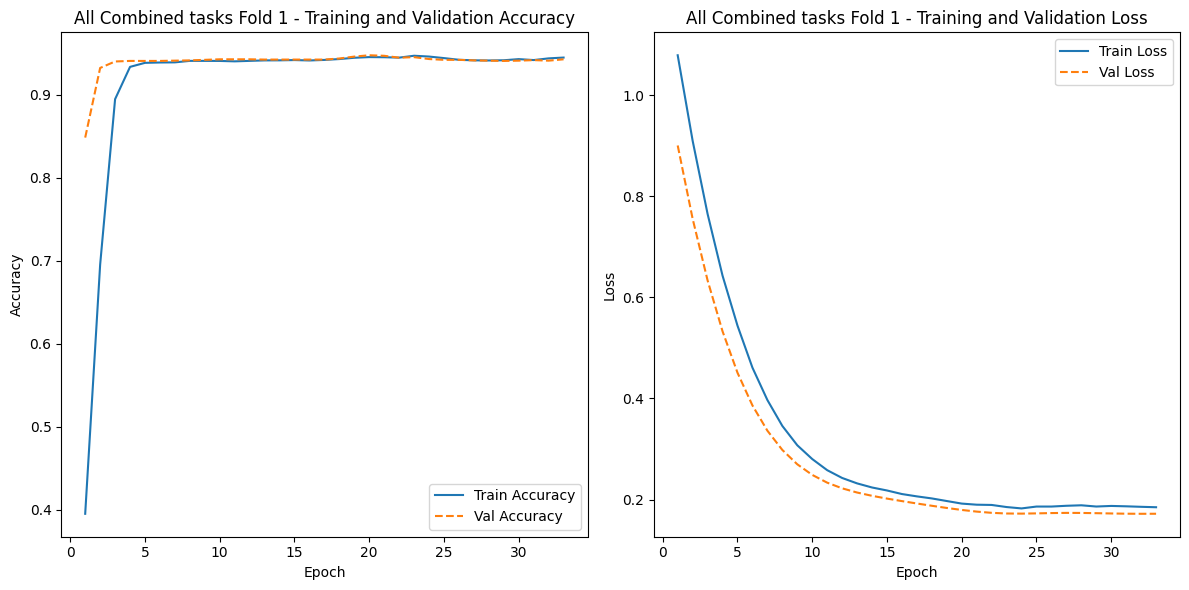

Epoch 1/100, Train Loss: 1.0835, Val Loss: 0.9313, Val Accuracy: 0.4701
Epoch 2/100, Train Loss: 0.9406, Val Loss: 0.8017, Val Accuracy: 0.9209
Epoch 3/100, Train Loss: 0.8122, Val Loss: 0.6879, Val Accuracy: 0.9365
Epoch 4/100, Train Loss: 0.6987, Val Loss: 0.5886, Val Accuracy: 0.9414
Epoch 5/100, Train Loss: 0.6019, Val Loss: 0.5029, Val Accuracy: 0.9437
Epoch 6/100, Train Loss: 0.5193, Val Loss: 0.4313, Val Accuracy: 0.9437
Epoch 7/100, Train Loss: 0.4495, Val Loss: 0.3723, Val Accuracy: 0.9447
Epoch 8/100, Train Loss: 0.3923, Val Loss: 0.3251, Val Accuracy: 0.9460
Epoch 9/100, Train Loss: 0.3459, Val Loss: 0.2884, Val Accuracy: 0.9456
Epoch 10/100, Train Loss: 0.3098, Val Loss: 0.2608, Val Accuracy: 0.9463
Epoch 11/100, Train Loss: 0.2840, Val Loss: 0.2405, Val Accuracy: 0.9463
Epoch 12/100, Train Loss: 0.2657, Val Loss: 0.2256, Val Accuracy: 0.9463
Epoch 13/100, Train Loss: 0.2507, Val Loss: 0.2148, Val Accuracy: 0.9463
Epoch 14/100, Train Loss: 0.2409, Val Loss: 0.2067, Val Accu

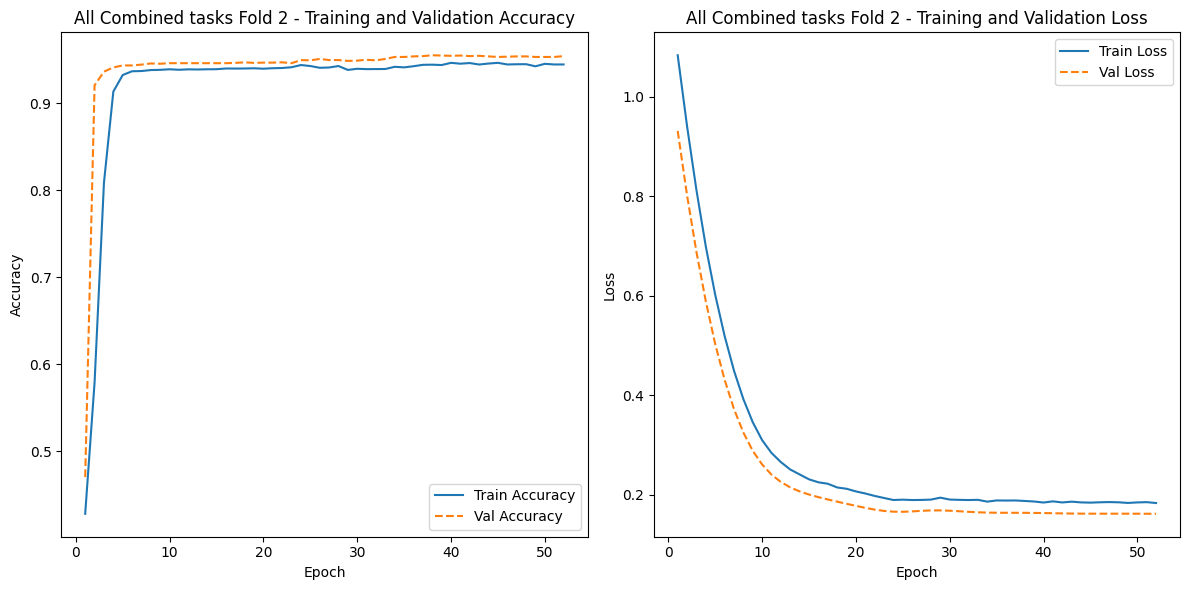

Epoch 1/100, Train Loss: 1.0620, Val Loss: 0.8896, Val Accuracy: 0.9375
Epoch 2/100, Train Loss: 0.8945, Val Loss: 0.7469, Val Accuracy: 0.9411
Epoch 3/100, Train Loss: 0.7548, Val Loss: 0.6270, Val Accuracy: 0.9407
Epoch 4/100, Train Loss: 0.6339, Val Loss: 0.5276, Val Accuracy: 0.9420
Epoch 5/100, Train Loss: 0.5359, Val Loss: 0.4464, Val Accuracy: 0.9424
Epoch 6/100, Train Loss: 0.4535, Val Loss: 0.3815, Val Accuracy: 0.9420
Epoch 7/100, Train Loss: 0.3894, Val Loss: 0.3316, Val Accuracy: 0.9420
Epoch 8/100, Train Loss: 0.3391, Val Loss: 0.2940, Val Accuracy: 0.9420
Epoch 9/100, Train Loss: 0.3014, Val Loss: 0.2661, Val Accuracy: 0.9420
Epoch 10/100, Train Loss: 0.2728, Val Loss: 0.2462, Val Accuracy: 0.9420
Epoch 11/100, Train Loss: 0.2517, Val Loss: 0.2323, Val Accuracy: 0.9420
Epoch 12/100, Train Loss: 0.2394, Val Loss: 0.2229, Val Accuracy: 0.9420
Epoch 13/100, Train Loss: 0.2278, Val Loss: 0.2165, Val Accuracy: 0.9420
Epoch 14/100, Train Loss: 0.2199, Val Loss: 0.2119, Val Accu

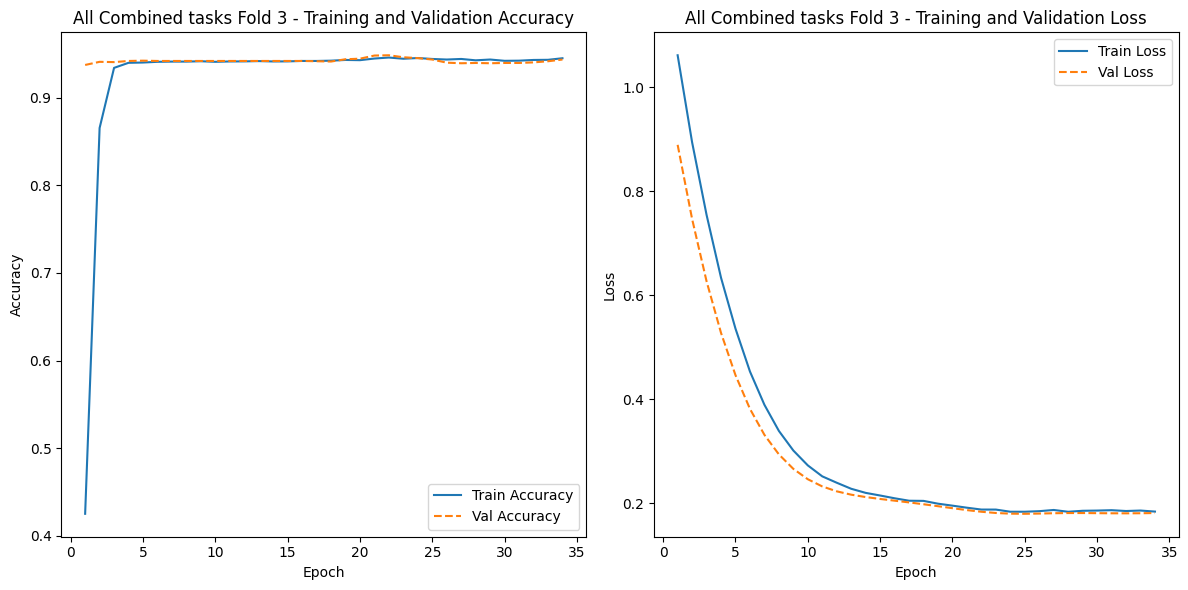

Epoch 1/100, Train Loss: 1.2070, Val Loss: 1.0178, Val Accuracy: 0.9052
Epoch 2/100, Train Loss: 1.0266, Val Loss: 0.8582, Val Accuracy: 0.9368
Epoch 3/100, Train Loss: 0.8632, Val Loss: 0.7217, Val Accuracy: 0.9388
Epoch 4/100, Train Loss: 0.7256, Val Loss: 0.6068, Val Accuracy: 0.9385
Epoch 5/100, Train Loss: 0.6121, Val Loss: 0.5122, Val Accuracy: 0.9381
Epoch 6/100, Train Loss: 0.5156, Val Loss: 0.4375, Val Accuracy: 0.9378
Epoch 7/100, Train Loss: 0.4397, Val Loss: 0.3798, Val Accuracy: 0.9388
Epoch 8/100, Train Loss: 0.3832, Val Loss: 0.3353, Val Accuracy: 0.9388
Epoch 9/100, Train Loss: 0.3368, Val Loss: 0.3022, Val Accuracy: 0.9394
Epoch 10/100, Train Loss: 0.3046, Val Loss: 0.2780, Val Accuracy: 0.9394
Epoch 11/100, Train Loss: 0.2796, Val Loss: 0.2606, Val Accuracy: 0.9394
Epoch 12/100, Train Loss: 0.2599, Val Loss: 0.2484, Val Accuracy: 0.9394
Epoch 13/100, Train Loss: 0.2476, Val Loss: 0.2398, Val Accuracy: 0.9394
Epoch 14/100, Train Loss: 0.2387, Val Loss: 0.2336, Val Accu

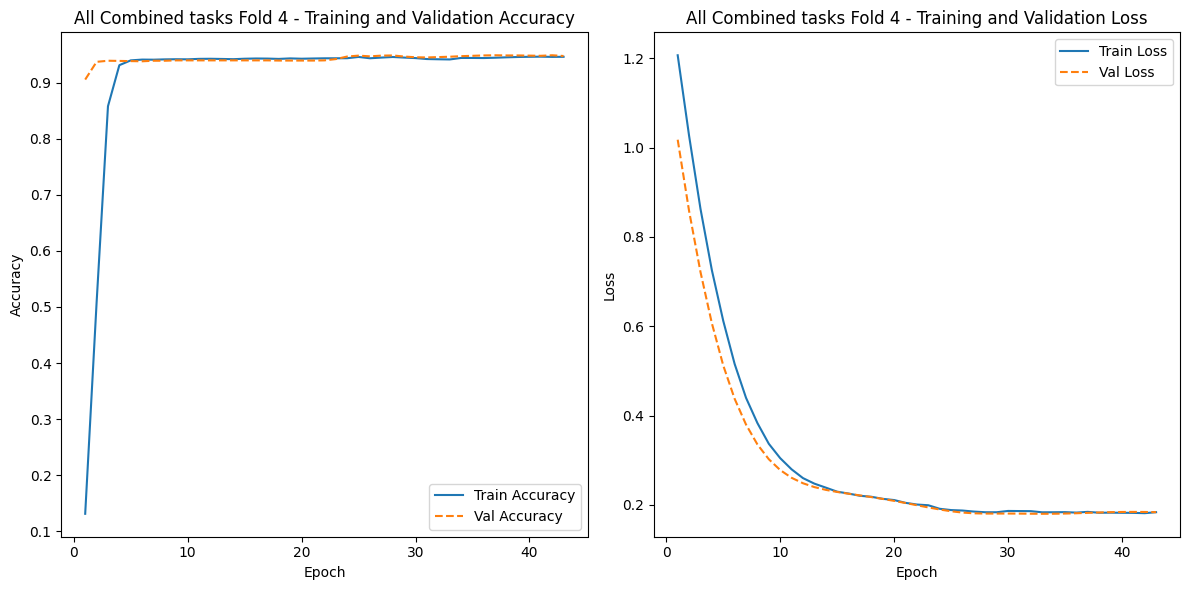

Epoch 1/100, Train Loss: 1.1179, Val Loss: 0.9590, Val Accuracy: 0.9300
Epoch 2/100, Train Loss: 0.9656, Val Loss: 0.8276, Val Accuracy: 0.9342
Epoch 3/100, Train Loss: 0.8340, Val Loss: 0.7134, Val Accuracy: 0.9355
Epoch 4/100, Train Loss: 0.7208, Val Loss: 0.6156, Val Accuracy: 0.9372
Epoch 5/100, Train Loss: 0.6215, Val Loss: 0.5332, Val Accuracy: 0.9375
Epoch 6/100, Train Loss: 0.5384, Val Loss: 0.4651, Val Accuracy: 0.9385
Epoch 7/100, Train Loss: 0.4704, Val Loss: 0.4094, Val Accuracy: 0.9385
Epoch 8/100, Train Loss: 0.4150, Val Loss: 0.3641, Val Accuracy: 0.9381
Epoch 9/100, Train Loss: 0.3684, Val Loss: 0.3277, Val Accuracy: 0.9381
Epoch 10/100, Train Loss: 0.3314, Val Loss: 0.2990, Val Accuracy: 0.9378
Epoch 11/100, Train Loss: 0.3029, Val Loss: 0.2765, Val Accuracy: 0.9385
Epoch 12/100, Train Loss: 0.2797, Val Loss: 0.2591, Val Accuracy: 0.9391
Epoch 13/100, Train Loss: 0.2604, Val Loss: 0.2457, Val Accuracy: 0.9385
Epoch 14/100, Train Loss: 0.2453, Val Loss: 0.2353, Val Accu

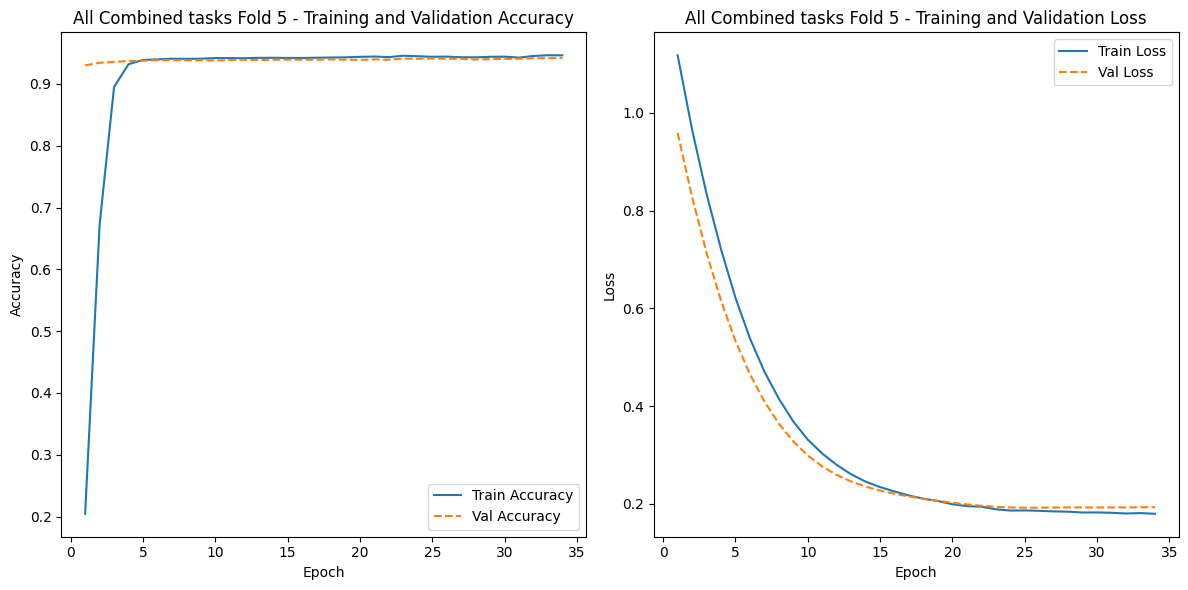

Average Validation Loss for All Combined tasks across 5 folds: 0.1784
Average Validation Accuracy for All Combined tasks across 5 folds: 0.9461


In [57]:
# Task all
task_name = 'All Combined tasks'
X_train = X_train_all
y_train = y_train_all
avg_val_loss_all, avg_val_accuracy_all = cross_validate(task_name, X_train, y_train)


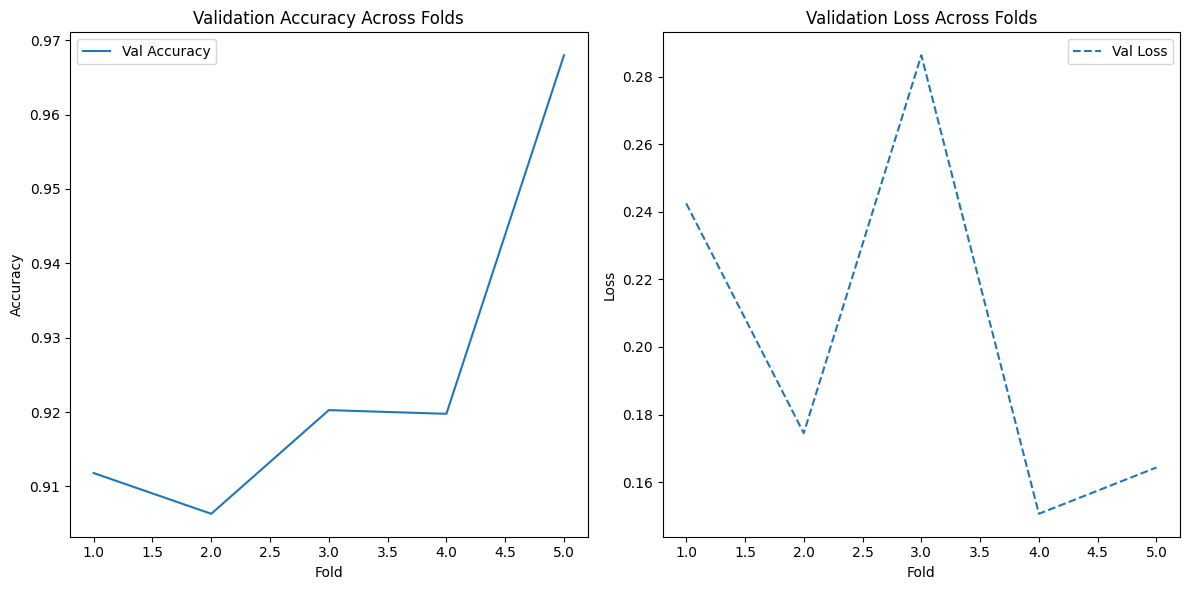

In [60]:
import matplotlib.pyplot as plt

# Define arrays to store the average accuracies and losses
val_accuracies = []
val_losses = []

# Sample cross-validation results (replace with your data)
k = 5
for fold_idx in range(k):
    # Suppose you have val_losses and val_accuracies recorded for each fold
    val_losses.append(np.random.uniform(0.1, 0.3))  # Random sample values
    val_accuracies.append(np.random.uniform(0.9, 0.97))

# Plotting the average validation accuracy and loss
plt.figure(figsize=(12, 6))

# Validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, k + 1), val_accuracies, label='Val Accuracy')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Across Folds")
plt.legend()

# Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, k + 1), val_losses, label='Val Loss', linestyle='--')
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.title("Validation Loss Across Folds")
plt.legend()

plt.tight_layout()
plt.show()
